In [5]:
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
import missingno as msno
import plotly.express as px
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import warnings
import seaborn as sns

pd.set_option('max_columns', None)

# 1. Data set 
## 1.1 Analyze data
### 1.1.1 Description

In [6]:
df2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
df2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [7]:
df2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [8]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
df2015.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   
3              5      2015  NonResidential               Hotel   
4              8      2015  NonResidential               Hotel   

            PropertyName TaxParcelIdentificationNumber  \
0   MAYFLOWER PARK HOTEL                     659000030   
1        PARAMOUNT HOTEL                     659000220   
2           WESTIN HOTEL                     659000475   
3              HOTEL MAX                     659000640   
4  WARWICK SEATTLE HOTEL                     659000970   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   
3  {'latitude': '47.61421585', 'longitude': '-122...                    7   
4  {'latitude': '47.6137544', 'longitude': '-122....                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   
3     DOWNTOWN       1926                  1            10.0   
4     DOWNTOWN       1980                  1            18.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   
3             61320                   0                   61320   
4            119890               12460                  107430   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   
3                          Hotel                  Hotel   
4  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   
3                    61320.0                          NaN   
4                   123445.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   
3                              NaN                         NaN   
4                          68009.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   
3                             NaN                      NaN              1.0   
4                             0.0                      NaN             67.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   
3             460.4               462.5               636.3   
4             120.1               122.1               228.8   

   SourceEUIWN(kBtu/sf)  SiteEner

In [10]:
3905411.0+4448985.0 

8354396.0

In [11]:
df2015.describe()

OSEBuildingID  DataYear  CouncilDistrictCode    YearBuilt  \
count    3340.000000    3340.0          3340.000000  3340.000000   
mean    20522.168263    2015.0             4.450898  1967.624850   
std     11511.515874       0.0             2.127203    32.949847   
min         1.000000    2015.0             1.000000  1900.000000   
25%     19921.750000    2015.0             3.000000  1947.000000   
50%     22977.000000    2015.0             4.000000  1973.000000   
75%     25748.000000    2015.0             7.000000  1996.000000   
max     50059.000000    2015.0             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3340.000000     3332.000000      3.340000e+03   
mean            1.035629        4.682173      9.077289e+04   
std             0.784463        5.458460      1.493058e+05   
min             1.000000        0.000000      2.000000e+04   
25%             1.000000        2.000000      2.848700e+04   
50%             1.000000        4.000000      4.385500e+04   
75%             1.000000        5.000000      8.842800e+04   
max            39.000000       99.000000      2.200000e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3340.000000            3.340000e+03               3.204000e+03   
mean         11054.032335            7.971886e+04               7.488154e+04   
std          35296.330507            1.292314e+05               1.236249e+05   
min             -3.000000           -5.055000e+04               5.872000e+03   
25%              0.000000            2.668300e+04               2.500000e+04   
50%              0.000000            4.132600e+04               3.900000e+04   
75%           4304.250000            7.872600e+04               7.206750e+04   
max         512608.000000            2.200000e+06               1.719643e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1559.000000                      560.000000   
mean                      27675.646568                    10755.708929   
std                       52480.843425                    22618.529737   
min                           0.000000                        0.000000   
25%                        4959.000000                     2385.250000   
50%                       10600.000000                     5019.500000   
75%                       26224.500000                    10275.000000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2560.000000       3330.000000         3330.000000   
mean         67.894141         53.626126           57.586547   
std          27.154057         53.893311           55.604963   
min           1.000000          0.000000            0.000000   
25%          51.750000         27.300000           29.700000   
50%          76.000000         37.400000           40.900000   
75%          90.000000         59.875000           65.575000   
max         100.000000        800.600000          800.600000   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3330.000000           3330.000000         3.330000e+03   
mean           132.779730            138.936036         4.983106e+06   
std            131.943223            131.359121         1.375330e+07   
min             -2.000000             -2.000000         0.000000e+00   
25%             73.500000             80.300000         9.139300e+05   
50%             95.000000            102.800000         1.776219e+06   
75%            143.900000            151.275000         4.044277e+06   
max           2511.100000           2511.000000         2.958126e+08   

       SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  Electricity(kWh)  \
count           3.330000e+03    3.330000e+03      3.330000e+03   
mean            5.203055e+06    2.502851e+05      1.017897e+06   
std             1.40075

In [12]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [13]:
df2016.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [14]:
df2016.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

## Selecting non- residential buildings

In [15]:
df2015.BuildingType.value_counts()

NonResidential          1461
Multifamily LR (1-4)    1029
Multifamily MR (5-9)     554
Multifamily HR (10+)     107
SPS-District K-12         99
Nonresidential COS        68
Campus                    22
Name: BuildingType, dtype: int64

In [16]:
df2015 = df2015[~df2015.BuildingType.str.contains('Multifamily')]
df2015 = df2015.reset_index(drop=True)
df2015.BuildingType.value_counts()

NonResidential        1461
SPS-District K-12       99
Nonresidential COS      68
Campus                  22
Name: BuildingType, dtype: int64

In [17]:
df2016.BuildingType.value_counts()

NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64

In [18]:
df2016 = df2016[~df2016.BuildingType.str.contains('Multifamily')]
df2016 = df2016.reset_index(drop=True)
df2016.BuildingType.value_counts()

NonResidential        1460
SPS-District K-12       98
Nonresidential COS      85
Campus                  24
Nonresidential WA        1
Name: BuildingType, dtype: int64

In [19]:
df2016.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    292
Other                          250
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             114
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [20]:
df2015.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    296
Other                          252
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    136
Mixed Use Property             106
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              21
Senior Care Community           19
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    11
Hospital                        10
SPS-District K-12                4
Low-Rise Multifamily             2
Distribution Center              2
Self-Storage Facility            1
Laboratory                       1
Restaurant                       1
Name: PrimaryPropertyType, dtype: int64

### 1.1.2 Duplicates 

In [21]:
df2015[df2015.duplicated(subset = 'OSEBuildingID')]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, TaxParcelIdentificationNumber, Location, CouncilDistrictCode, Neighborhood, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), OtherFuelUse(kBtu), GHGEmissions(MetricTonsCO2e), GHGEmissionsIntensity(kgCO2e/ft2), DefaultData, Comment, ComplianceStatus, Outlier, 2010 Census Tracts, Seattle Police Department Micro Community Policing Plan Areas, City Council Districts, SPD Beats, Zip Codes]
Index: []

In [22]:
df2016[df2016.duplicated(subset = 'OSEBuildingID')]

Empty DataFrame
Columns: [OSEBuildingID, DataYear, BuildingType, PrimaryPropertyType, PropertyName, Address, City, State, ZipCode, TaxParcelIdentificationNumber, CouncilDistrictCode, Neighborhood, Latitude, Longitude, YearBuilt, NumberofBuildings, NumberofFloors, PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s), ListOfAllPropertyUseTypes, LargestPropertyUseType, LargestPropertyUseTypeGFA, SecondLargestPropertyUseType, SecondLargestPropertyUseTypeGFA, ThirdLargestPropertyUseType, ThirdLargestPropertyUseTypeGFA, YearsENERGYSTARCertified, ENERGYSTARScore, SiteEUI(kBtu/sf), SiteEUIWN(kBtu/sf), SourceEUI(kBtu/sf), SourceEUIWN(kBtu/sf), SiteEnergyUse(kBtu), SiteEnergyUseWN(kBtu), SteamUse(kBtu), Electricity(kWh), Electricity(kBtu), NaturalGas(therms), NaturalGas(kBtu), DefaultData, Comments, ComplianceStatus, Outlier, TotalGHGEmissions, GHGEmissionsIntensity]
Index: []

**Electricity and CO2 must be predicted for the following buildings**

In [23]:
print(df2015.shape)
print(df2016.shape)

(1650, 47)
(1668, 46)


In [24]:
df2015['OSEBuildingID'].isin(df2016['OSEBuildingID']).value_counts()

True     1620
False      30
Name: OSEBuildingID, dtype: int64

## 1.2 Selecting main features from DataSet

In [25]:
df_count = df2015.count().sort_values(ascending = False)
df_mean_count = (df_count.mean())*100/(len(df2015))
a = (df_count)*100/(len(df2015))
fig = px.bar(a, x = a.index, y= a, color = a, title = 'Data available per variable', labels={"y": "% of data", "index": "variables"})
fig.add_hline(y=df_mean_count, line_width=2, line_dash='dash')
fig.show()

In [26]:
df_count = df2016.count().sort_values(ascending = False)
df_mean_count = (df_count.mean())*100/(len(df2016))
a = (df_count)*100/(len(df2016))
fig = px.bar(a, x = a.index, y= a, color = a, title = 'Data available per variable', labels={"y": "% of data", "index": "variables"})
fig.add_hline(y=df_mean_count, line_width=2, line_dash='dash')
fig.show()

In [27]:
df2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [28]:
mf2015=df2015[['OSEBuildingID', 'PrimaryPropertyType','DataYear', 'YearBuilt', 'NumberofFloors','PropertyGFATotal','ENERGYSTARScore','SiteEnergyUse(kBtu)',
              'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)','GHGEmissions(MetricTonsCO2e)']]

In [29]:
df2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [30]:
mf2016=df2016[['OSEBuildingID', 'PrimaryPropertyType','DataYear', 'YearBuilt', 'NumberofFloors','PropertyGFATotal','ENERGYSTARScore','SiteEnergyUse(kBtu)',
              'SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)', 'TotalGHGEmissions']]

In [31]:
mf2015.describe()

OSEBuildingID  DataYear    YearBuilt  NumberofFloors  PropertyGFATotal  \
count    1650.000000    1650.0  1650.000000     1642.000000      1.650000e+03   
mean    15563.090909    2015.0  1961.155758        4.132765      1.124570e+05   
std     12962.447249       0.0    32.682913        6.573313      1.934977e+05   
min         1.000000    2015.0  1900.000000        0.000000      2.000000e+04   
25%       575.250000    2015.0  1929.000000        1.000000      2.962200e+04   
50%     21096.000000    2015.0  1965.000000        2.000000      4.905900e+04   
75%     24483.500000    2015.0  1988.750000        4.000000      1.041725e+05   
max     50038.000000    2015.0  2014.000000       99.000000      2.200000e+06   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count      1117.000000         1.643000e+03    1.643000e+03   
mean         64.195166         7.694147e+06    4.739658e+05   
std          28.604701         1.889802e+07    4.919901e+06   
min           1.000000         0.000000e+00    0.000000e+00   
25%          46.000000         1.222551e+06    0.000000e+00   
50%          72.000000         2.467851e+06    0.000000e+00   
75%          88.000000         6.925508e+06    0.000000e+00   
max         100.000000         2.958126e+08    1.278697e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissions(MetricTonsCO2e)  
count       1.643000e+03      1.643000e+03                   1643.000000  
mean        5.426721e+06      1.780805e+06                    168.993183  
std         1.311210e+07      6.051488e+06                    566.803048  
min         0.000000e+00      0.000000e+00                      0.000000  
25%         7.289070e+05      0.000000e+00                     19.275000  
50%         1.640844e+06      4.694940e+05                     48.600000  
75%         4.886316e+06      1.430686e+06                    138.055000  
max         2.847263e+08      1.364484e+08                  11824.890000

In [32]:
mf2016.describe()

OSEBuildingID  DataYear    YearBuilt  NumberofFloors  PropertyGFATotal  \
count    1668.000000    1668.0  1668.000000     1668.000000      1.668000e+03   
mean    16336.346523    2016.0  1961.913669        4.121103      1.188427e+05   
std     13835.292512       0.0    32.741755        6.563407      2.973622e+05   
min         1.000000    2016.0  1900.000000        0.000000      1.128500e+04   
25%       582.750000    2016.0  1930.000000        1.000000      2.947775e+04   
50%     21143.500000    2016.0  1965.000000        2.000000      4.928950e+04   
75%     24602.250000    2016.0  1989.000000        4.000000      1.053250e+05   
max     50226.000000    2016.0  2015.000000       99.000000      9.320156e+06   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count      1094.000000         1.666000e+03    1.666000e+03   
mean         65.449726         8.437933e+06    5.125726e+05   
std          28.492928         3.024380e+07    5.513944e+06   
min           1.000000         0.000000e+00    0.000000e+00   
25%          48.000000         1.229291e+06    0.000000e+00   
50%          73.000000         2.554947e+06    0.000000e+00   
75%          89.000000         6.913348e+06    0.000000e+00   
max         100.000000         8.739237e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  
count       1.666000e+03      1.666000e+03        1666.000000  
mean        5.843493e+06      1.970845e+06         184.973301  
std         2.079673e+07      9.370814e+06         751.976001  
min        -1.154170e+05      0.000000e+00          -0.800000  
25%         7.213255e+05      0.000000e+00          19.967500  
50%         1.611881e+06      4.982630e+05          49.580000  
75%         4.847589e+06      1.520000e+06         142.382500  
max         6.570744e+08      2.979090e+08       16870.980000

In [33]:
#Variables TotalGHGEmission and GHGEmissions(MetricTonsCO2e) have the similar values, they must mean the same thing
mf2016 = mf2016.rename({'TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'}, axis=1)
mf2016.head()

OSEBuildingID PrimaryPropertyType  DataYear  YearBuilt  NumberofFloors  \
0              1               Hotel      2016       1927              12   
1              2               Hotel      2016       1996              11   
2              3               Hotel      2016       1969              41   
3              5               Hotel      2016       1926              10   
4              8               Hotel      2016       1980              18   

   PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
0             88434             60.0            7226362.5      2003882.00   
1            103566             61.0            8387933.0            0.00   
2            956110             43.0           72587024.0     21566554.00   
3             61320             56.0            6794584.0      2214446.25   
4            175580             75.0           14172606.0            0.00   

   Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissions(MetricTonsCO2e)  
0          3946027.0         1276453.0                        249.98  
1          3242851.0         5145082.0                        295.86  
2         49526664.0         1493800.0                       2089.28  
3          2768924.0         1811213.0                        286.43  
4          5368607.0         8803998.0                        505.01

In [34]:
#concat mf2015 and 2016
mf= pd.concat([mf2015, mf2016], ignore_index=True, sort=False)
mf.shape

(3318, 12)

In [35]:
mf = mf.reset_index(drop=True)

In [36]:
mf.describe()

OSEBuildingID     DataYear    YearBuilt  NumberofFloors  \
count    3318.000000  3318.000000  3318.000000     3310.000000   
mean    15951.816154  2015.502712  1961.536769        4.126888   
std     13411.897096     0.500068    32.709772        6.567333   
min         1.000000  2015.000000  1900.000000        0.000000   
25%       579.000000  2015.000000  1930.000000        1.000000   
50%     21122.000000  2016.000000  1965.000000        2.000000   
75%     24556.750000  2016.000000  1989.000000        4.000000   
max     50226.000000  2016.000000  2015.000000       99.000000   

       PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
count      3.318000e+03      2211.000000         3.309000e+03    3.309000e+03   
mean       1.156672e+05        64.815920         8.068625e+06    4.934034e+05   
std        2.511222e+05        28.549886         2.525462e+07    5.226678e+06   
min        1.128500e+04         1.000000         0.000000e+00    0.000000e+00   
25%        2.951225e+04        47.000000         1.223425e+06    0.000000e+00   
50%        4.924600e+04        72.000000         2.505271e+06    0.000000e+00   
75%        1.047860e+05        89.000000         6.917280e+06    0.000000e+00   
max        9.320156e+06       100.000000         8.739237e+08    1.349435e+08   

       Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissions(MetricTonsCO2e)  
count       3.309000e+03      3.309000e+03                   3309.000000  
mean        5.636556e+06      1.876485e+06                    177.038779  
std         1.740900e+07      7.898387e+06                    666.442480  
min        -1.154170e+05      0.000000e+00                     -0.800000  
25%         7.236670e+05      0.000000e+00                     19.720000  
50%         1.623657e+06      4.797690e+05                     49.160000  
75%         4.878886e+06      1.471375e+06                    138.870000  
max         6.570744e+08      2.979090e+08                  16870.980000

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:

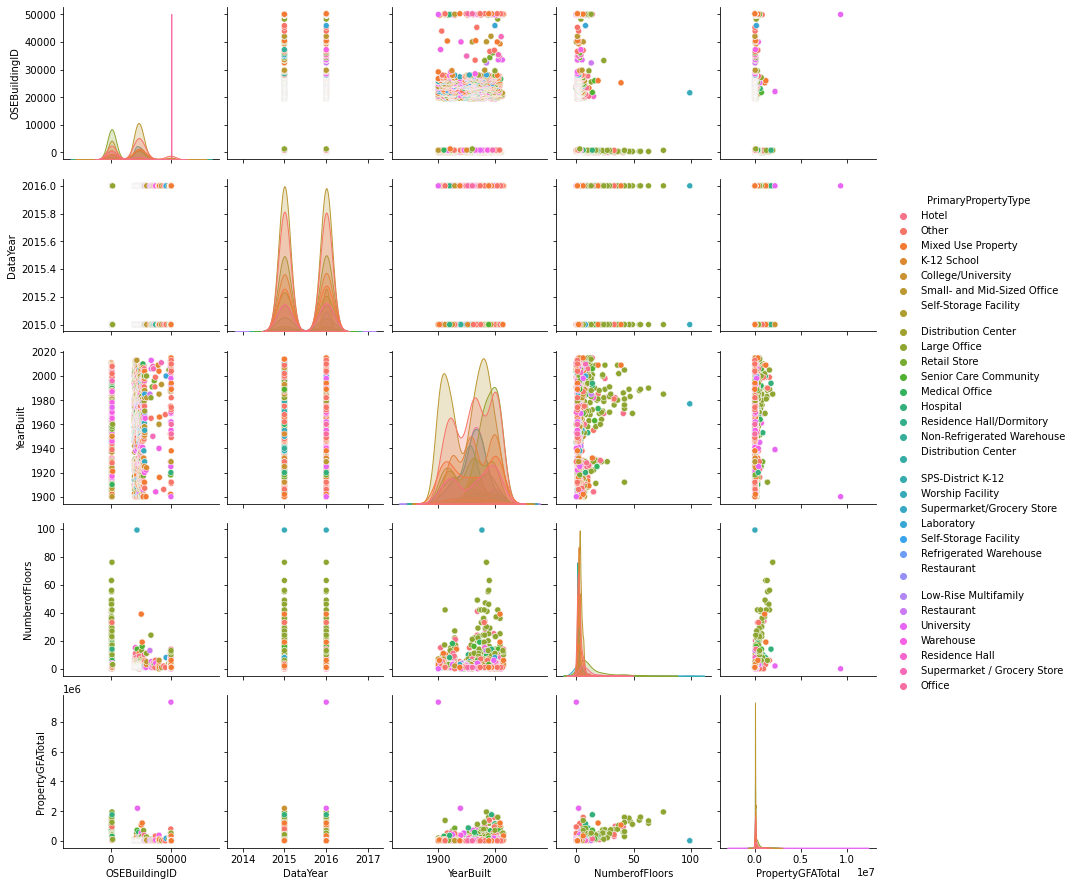

In [37]:
sns.pairplot(mf[['OSEBuildingID','PrimaryPropertyType','DataYear','YearBuilt','NumberofFloors','PropertyGFATotal']], hue="PrimaryPropertyType")

**Outliers**

In [38]:
#number of floors > to 80 are not existent.
mf = mf[mf.NumberofFloors<80]

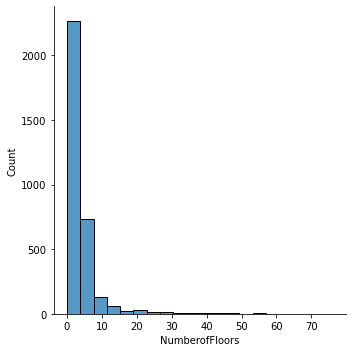

In [39]:
#sns.histplot(data=mf, x=mf.index, y='NumberofFloors', hue='DataYear')
sns.displot(mf.NumberofFloors, bins=20)

In [40]:
#GroundSurface superieur than 8x10**8 only happens for a big Campus, this is not commun
mf = mf[mf.PropertyGFATotal<8*10**6]

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='PropertyGFATotal', ylabel='Density'>

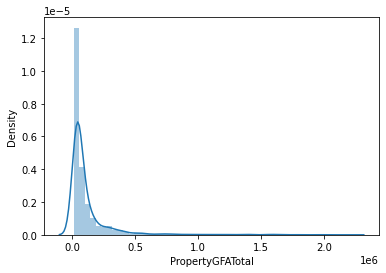

In [41]:
sns.distplot(mf.PropertyGFATotal)

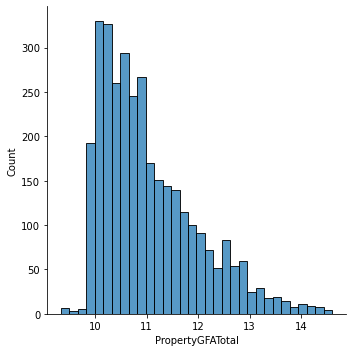

In [42]:
sns.displot(np.log(mf.PropertyGFATotal))

**How electricity has been consumed in 2015 and 2016**

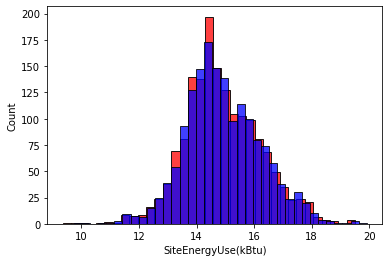

In [43]:
mf = mf[mf['SiteEnergyUse(kBtu)']>0]
sns.histplot(x=np.log(mf['SiteEnergyUse(kBtu)'][mf.DataYear==2015]), color='r')
sns.histplot(x=np.log(mf['SiteEnergyUse(kBtu)'][mf.DataYear==2016]), color='b')
plt.show()

In [44]:
elec_var = pd.DataFrame()
elec_var['OSEBuildingID']= df2015.OSEBuildingID[df2015['OSEBuildingID'].isin(df2016['OSEBuildingID'])]
elec_var = elec_var.merge(df2015[['OSEBuildingID','SiteEnergyUse(kBtu)', 'PropertyGFATotal','NumberofFloors']], on='OSEBuildingID')
elec_var = elec_var.merge(df2016[['OSEBuildingID','SiteEnergyUse(kBtu)', 'PropertyGFATotal','NumberofFloors']], on='OSEBuildingID')


In [45]:
elec_var.shape

(1620, 7)

In [46]:
elec_var.head()

OSEBuildingID  SiteEnergyUse(kBtu)_x  PropertyGFATotal_x  NumberofFloors_x  \
0              1              6981428.0               88434              12.0   
1              2              8354235.0              103566              11.0   
2              3             73130656.0              961990              41.0   
3              5             28229320.0               61320              10.0   
4              8             14829099.0              119890              18.0   

   SiteEnergyUse(kBtu)_y  PropertyGFATotal_y  NumberofFloors_y  
0              7226362.5               88434                12  
1              8387933.0              103566                11  
2             72587024.0              956110                41  
3              6794584.0               61320                10  
4             14172606.0              175580                18

In [47]:
elec_var=elec_var.rename(columns={'SiteEnergyUse(kBtu)_x' : 'seu_2015', 'PropertyGFATotal_x': 'surf_2015', 'NumberofFloors_x':'n_floors_2015','SiteEnergyUse(kBtu)_y':'seu_2016', 'PropertyGFATotal_y':'surf_2016', 'NumberofFloors_y':'n_floors_2016'})

In [48]:
elec_var['new_id'] = elec_var.index

In [49]:
elec_var.dropna()
elec_var= elec_var[(elec_var.seu_2015>0)&(elec_var.seu_2016>0)]
elec_var.head()

OSEBuildingID    seu_2015  surf_2015  n_floors_2015    seu_2016  surf_2016  \
0              1   6981428.0      88434           12.0   7226362.5      88434   
1              2   8354235.0     103566           11.0   8387933.0     103566   
2              3  73130656.0     961990           41.0  72587024.0     956110   
3              5  28229320.0      61320           10.0   6794584.0      61320   
4              8  14829099.0     119890           18.0  14172606.0     175580   

   n_floors_2016  new_id  
0             12       0  
1             11       1  
2             41       2  
3             10       3  
4             18       4

In [50]:
elec_var.shape

(1595, 8)

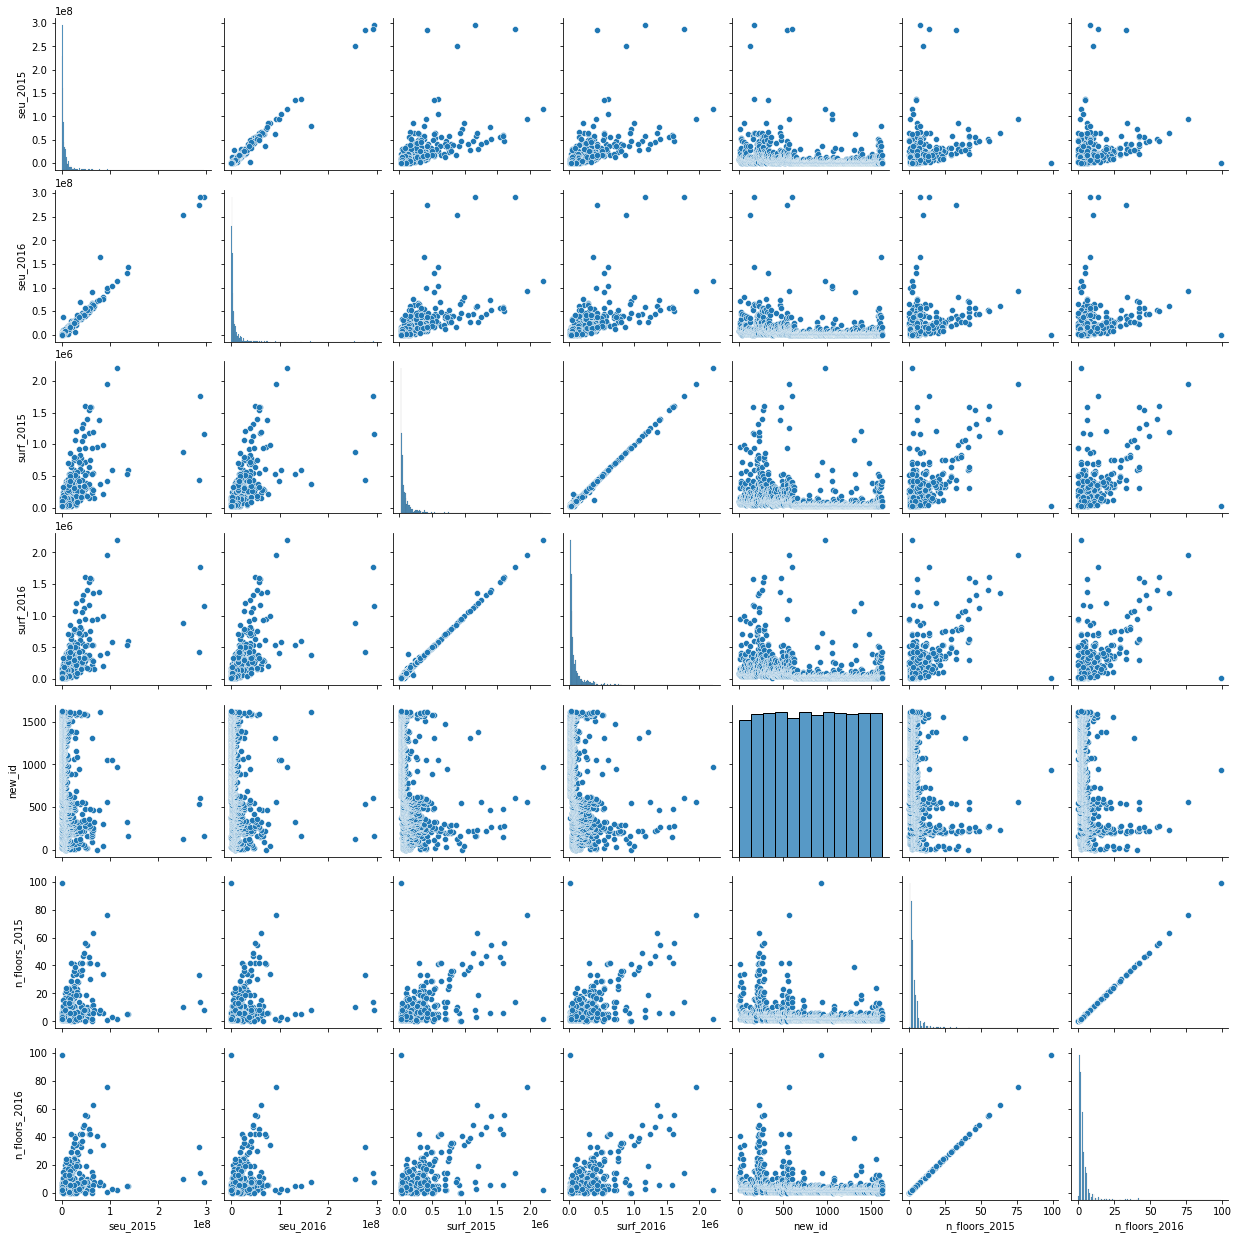

In [51]:
sns.pairplot(elec_var[['seu_2015','seu_2016','surf_2015','surf_2016','new_id', 'n_floors_2015','n_floors_2016']])

In [52]:
elec_var['diff_2016_2015'] = elec_var['seu_2016'] - elec_var['seu_2015']
elec_var['diff_surf_2016_2015'] = elec_var['surf_2016'] - elec_var['surf_2015']
elec_var['diff_floors_2016_2015']= elec_var['n_floors_2016'] - elec_var['n_floors_2015']

In [53]:
elec_var.describe()

OSEBuildingID      seu_2015     surf_2015  n_floors_2015      seu_2016  \
count    1595.000000  1.595000e+03  1.595000e+03    1587.000000  1.595000e+03   
mean    15625.867085  7.655007e+06  1.125472e+05       4.171393  7.742713e+06   
std     12948.662339  1.866654e+07  1.927943e+05       6.642624  1.895914e+07   
min         1.000000  1.144100e+04  2.000000e+04       0.000000  1.680890e+04   
25%       578.500000  1.223990e+06  2.962500e+04       1.000000  1.258197e+06   
50%     21108.000000  2.483099e+06  4.892500e+04       2.000000  2.563986e+06   
75%     24490.500000  7.009880e+06  1.042745e+05       4.000000  6.939776e+06   
max     50038.000000  2.958126e+08  2.200000e+06      99.000000  2.930908e+08   

          surf_2016  n_floors_2016       new_id  diff_2016_2015  \
count  1.595000e+03    1595.000000  1595.000000    1.595000e+03   
mean   1.128081e+05       4.152351   813.242633    8.770571e+04   
std    1.935757e+05       6.631546   466.470828    2.906122e+06   
min    1.630000e+04       0.000000     0.000000   -2.143474e+07   
25%    2.957200e+04       1.000000   409.500000   -1.342225e+05   
50%    4.906600e+04       2.000000   814.000000    1.273200e+04   
75%    1.040495e+05       4.000000  1216.500000    1.628354e+05   
max    2.200000e+06      99.000000  1619.000000    8.529392e+07   

       diff_surf_2016_2015  diff_floors_2016_2015  
count          1595.000000                 1587.0  
mean            260.937304                    0.0  
std            9847.442391                    0.0  
min         -153346.000000                    0.0  
25%               0.000000                    0.0  
50%               0.000000                    0.0  
75%               0.000000                    0.0  
max          260000.000000                    0.0

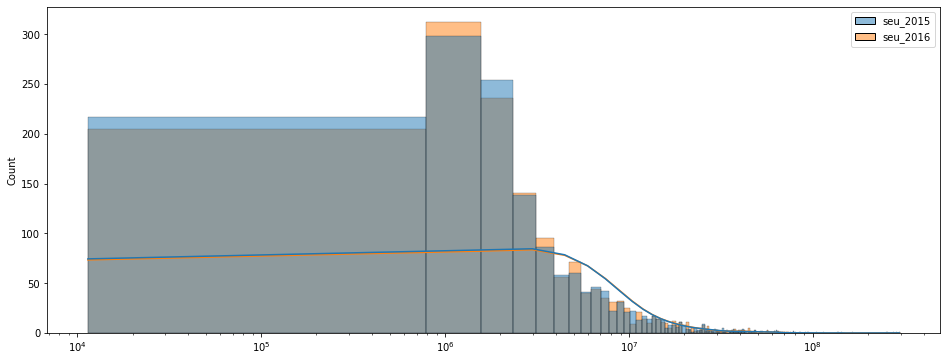

In [54]:
plt.figure(figsize=(16,6))

s = sns.histplot(data = elec_var[['seu_2015', 'seu_2016']], kde=True)
s.set(xscale='log')
plt.show()

In [55]:
plt.figure(figsize=(16,6))
px.line(elec_var,x='new_id',y='diff_2016_2015')

<Figure size 1152x432 with 0 Axes>

In [56]:
a = elec_var.OSEBuildingID[elec_var.diff_2016_2015 == elec_var.diff_2016_2015.max()].values


In [57]:
mf[mf['OSEBuildingID']== a[0]]

OSEBuildingID PrimaryPropertyType  DataYear  YearBuilt  NumberofFloors  \
1641          49940            Hospital      2015       1920             8.0   
3272          49940            Hospital      2016       1920             8.0   

      PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
1641            374466             97.0           78652064.0      47648276.0   
3272            374466             74.0          163945984.0      73885472.0   

      Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissions(MetricTonsCO2e)  
1641         31005073.0               0.0                       3894.01  
3272         90060497.0               0.0                       6330.91

In [58]:
plt.figure(figsize=(16,6))
px.line(elec_var,x='new_id',y='diff_surf_2016_2015')

<Figure size 1152x432 with 0 Axes>

In [59]:
plt.figure(figsize=(16,6))
px.line(elec_var,x='new_id',y='diff_floors_2016_2015')

<Figure size 1152x432 with 0 Axes>

In [60]:
px.scatter(elec_var, x='diff_surf_2016_2015', y='diff_2016_2015')

**CORRELATION BETWEEN FEATURES**

<AxesSubplot:>

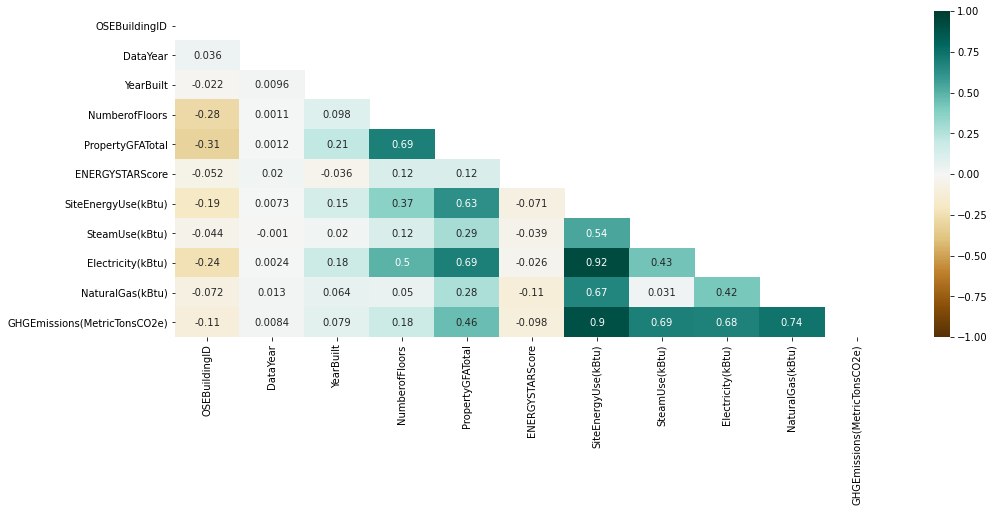

In [61]:
plt.figure(figsize=(16,6))
mask= np.triu(np.ones_like(mf.corr(), dtype=np.bool))
sns.heatmap(mf.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)

**DATA WITH MEAN VALUES FROM 2015 AND 2016**


In [62]:
print(mf2015.shape)
print(mf2015['SiteEnergyUse(kBtu)'][mf2015['SiteEnergyUse(kBtu)']==0].count())
mf2015.columns

(1650, 12)
2


Index(['OSEBuildingID', 'PrimaryPropertyType', 'DataYear', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

In [63]:
#drop nan
mf2015 = mf2015.dropna(subset=['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)' ])
#select only rows with value > 0
#
mf2015 = mf2015[(mf2015['SiteEnergyUse(kBtu)']>0) & ((mf2015['GHGEmissions(MetricTonsCO2e)']>0))]

In [64]:
print(mf2016.shape)
print(mf2016['SiteEnergyUse(kBtu)'][mf2016['SiteEnergyUse(kBtu)']==0].count())
mf2016.columns

(1668, 12)
16


Index(['OSEBuildingID', 'PrimaryPropertyType', 'DataYear', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'ENERGYSTARScore',
       'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)'],
      dtype='object')

In [65]:
#all values equal to 0 existent in 2015 with a value > 0
print(mf2016[(mf2016['SiteEnergyUse(kBtu)']==0)&(mf2015.OSEBuildingID.isin(mf2016.OSEBuildingID))].shape)
print(mf2016[(mf2016['SiteEnergyUse(kBtu)']==0)].shape)

(16, 12)
(16, 12)


In [66]:
#drop nan
mf2016 = mf2016.dropna(subset=['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)' ])
#select only rows with value > 0
#
mf2016 = mf2016[(mf2016['SiteEnergyUse(kBtu)']>0) & ((mf2016['GHGEmissions(MetricTonsCO2e)']>0))]

In [67]:
mf2015= mf2015.reset_index(drop=True)
mf2016= mf2016.reset_index(drop=True)

In [68]:
mfmean = pd.concat([mf2015,mf2016], ignore_index=True)
buildingtype = mfmean[['OSEBuildingID','PrimaryPropertyType']]
print(mfmean.shape)
mfmean = mfmean.groupby(['OSEBuildingID']).mean()
mfmean.rename(columns={'SiteEnergyUse(kBtu)':'m_seu', 'GHGEmissions(MetricTonsCO2e)':'m_co2e'}, inplace=True)
buildingtype = buildingtype.drop_duplicates(subset='OSEBuildingID', keep='last')
mfmean= pd.merge(mfmean,buildingtype, on='OSEBuildingID')

(3289, 12)


In [69]:
mfmean.shape

(1696, 12)

In [70]:
mfmean.head()

OSEBuildingID  DataYear  YearBuilt  NumberofFloors  PropertyGFATotal  \
0              1    2015.5     1927.0            12.0           88434.0   
1              2    2015.5     1996.0            11.0          103566.0   
2              3    2015.5     1969.0            41.0          959050.0   
3              5    2015.5     1926.0            10.0           61320.0   
4              8    2015.5     1980.0            18.0          147735.0   

   ENERGYSTARScore        m_seu  SteamUse(kBtu)  Electricity(kBtu)  \
0             62.5   7103895.25    2.013457e+06          3816093.5   
1             56.0   8371084.00    0.000000e+00          3574131.0   
2             30.5  72858840.00    2.061348e+07         49644549.5   
3             28.5  17511952.00    1.283648e+07          2768973.5   
4             71.0  14500852.50    0.000000e+00          5717426.0   

   NaturalGas(kBtu)    m_co2e PrimaryPropertyType  
0         1274420.5   249.705               Hotel  
1         4797033.5   279.685               Hotel  
2         2601850.0  2075.380               Hotel  
3         1906553.5  1111.385               Hotel  
4         8783551.5   506.355               Hotel

In [71]:
#Outlier
mfmean = mfmean[mfmean.PropertyGFATotal < 8*10**6]
mfmean = mfmean[mfmean.NumberofFloors < 80 ]
#Delete DataYear
mfmean= mfmean.drop(['DataYear'], axis=1)

In [72]:
px.scatter(mfmean, x=mfmean['OSEBuildingID'])

In [73]:
mfmean.describe()

OSEBuildingID    YearBuilt  NumberofFloors  PropertyGFATotal  \
count    1694.000000  1694.000000     1694.000000      1.694000e+03   
mean    16321.645218  1961.745573        4.051358      1.130425e+05   
std     13795.521622    32.850422        6.101356      1.931115e+05   
min         1.000000  1900.000000        0.000000      1.128500e+04   
25%       584.250000  1930.000000        1.000000      2.939250e+04   
50%     21147.500000  1965.000000        2.000000      4.925050e+04   
75%     24601.750000  1989.000000        4.000000      1.065892e+05   
max     50226.000000  2015.000000       76.000000      2.200000e+06   

       ENERGYSTARScore         m_seu  SteamUse(kBtu)  Electricity(kBtu)  \
count      1153.000000  1.694000e+03    1.694000e+03       1.694000e+03   
mean         64.938422  7.995879e+06    4.712041e+05       5.513196e+06   
std          28.047209  2.161662e+07    4.961616e+06       1.340053e+07   
min           1.000000  1.697945e+04    0.000000e+00       7.000000e+00   
25%          46.500000  1.240716e+06    0.000000e+00       7.360850e+05   
50%          72.500000  2.556019e+06    0.000000e+00       1.656692e+06   
75%          88.000000  6.958824e+06    0.000000e+00       4.879469e+06   
max         100.000000  4.483853e+08    1.314066e+08       2.796294e+08   

       NaturalGas(kBtu)        m_co2e  
count      1.694000e+03   1694.000000  
mean       1.979056e+06    179.912828  
std        9.409134e+06    697.989556  
min        0.000000e+00      0.120000  
25%        0.000000e+00     20.332500  
50%        5.012255e+05     50.362500  
75%        1.514965e+06    140.293750  
max        2.979090e+08  16870.980000

## 1.2 Features

In [74]:
px.histogram(mfmean.PrimaryPropertyType)

In [75]:
mfmean.PrimaryPropertyType.value_counts()

Small- and Mid-Sized Office    299
Other                          257
Warehouse                      187
Large Office                   176
K-12 School                    139
Mixed Use Property             114
Retail Store                    96
Hotel                           76
Worship Facility                71
Distribution Center             53
Medical Office                  42
Supermarket / Grocery Store     39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Office                           3
Non-Refrigerated Warehouse       2
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

In [76]:
mfmean= mfmean.replace(['Restaurant\n'],'Restaurant')
mfmean= mfmean.replace(['Non-Refrigerated Warehouse', 'Refrigerated Warehouse'],'Warehouse')
mfmean= mfmean.replace(['Small- and Mid-Sized Office', 'Large Office', 'Medical Office'],'Office')
mfmean = mfmean[mfmean.PrimaryPropertyType != 'Low-Rise Multifamily']
mfmean.PrimaryPropertyType.value_counts()

Office                         520
Other                          257
Warehouse                      201
K-12 School                    139
Mixed Use Property             114
Retail Store                    96
Hotel                           76
Worship Facility                71
Distribution Center             53
Supermarket / Grocery Store     39
Self-Storage Facility           28
University                      23
Residence Hall                  21
Senior Care Community           20
Restaurant                      13
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

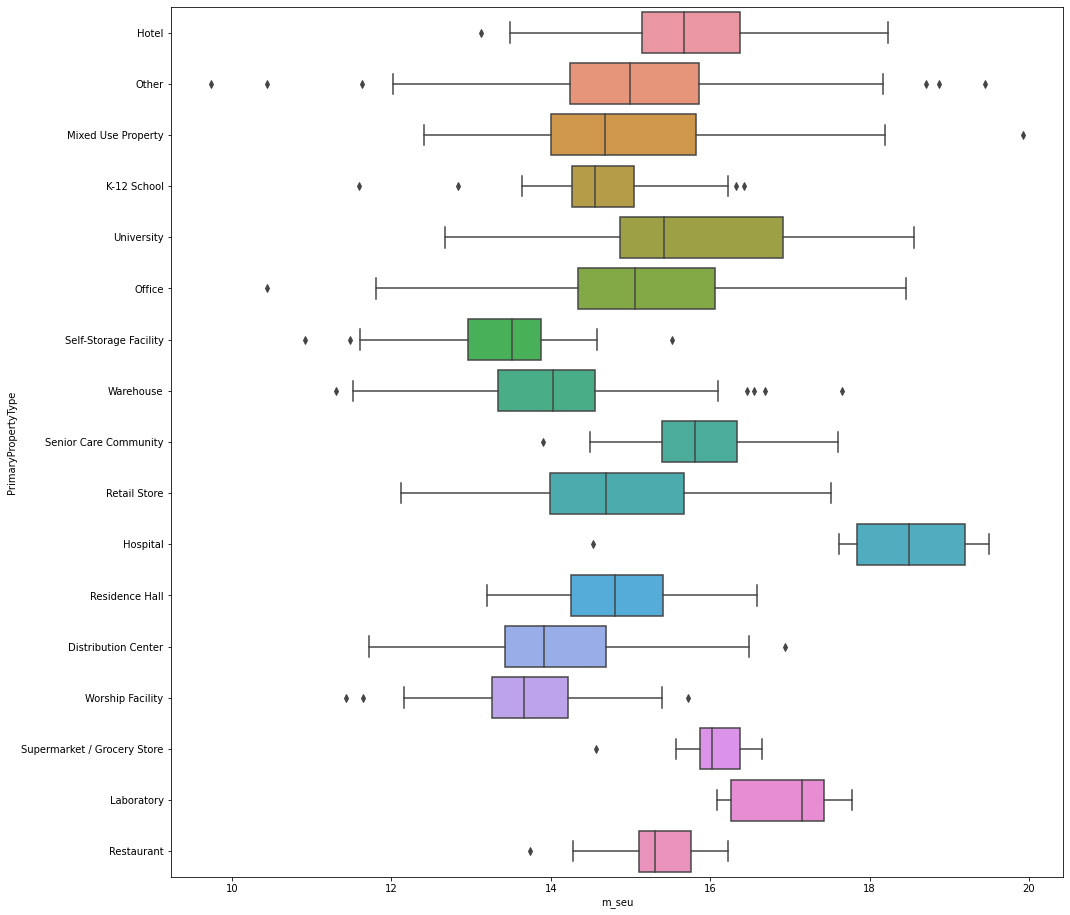

In [77]:
plt.figure(figsize=(16,16))
f1 = sns.boxplot(data= mfmean, x=np.log(mfmean['m_seu']), y='PrimaryPropertyType')

In [78]:
mfmean= mfmean.replace(['Office', 'K-12 School', 'Mixed Use Property', 'University', 'Retail Store'],'Other')
mfmean.PrimaryPropertyType.value_counts()

Other                          1149
Warehouse                       201
Hotel                            76
Worship Facility                 71
Distribution Center              53
Supermarket / Grocery Store      39
Self-Storage Facility            28
Residence Hall                   21
Senior Care Community            20
Restaurant                       13
Hospital                         10
Laboratory                       10
Name: PrimaryPropertyType, dtype: int64

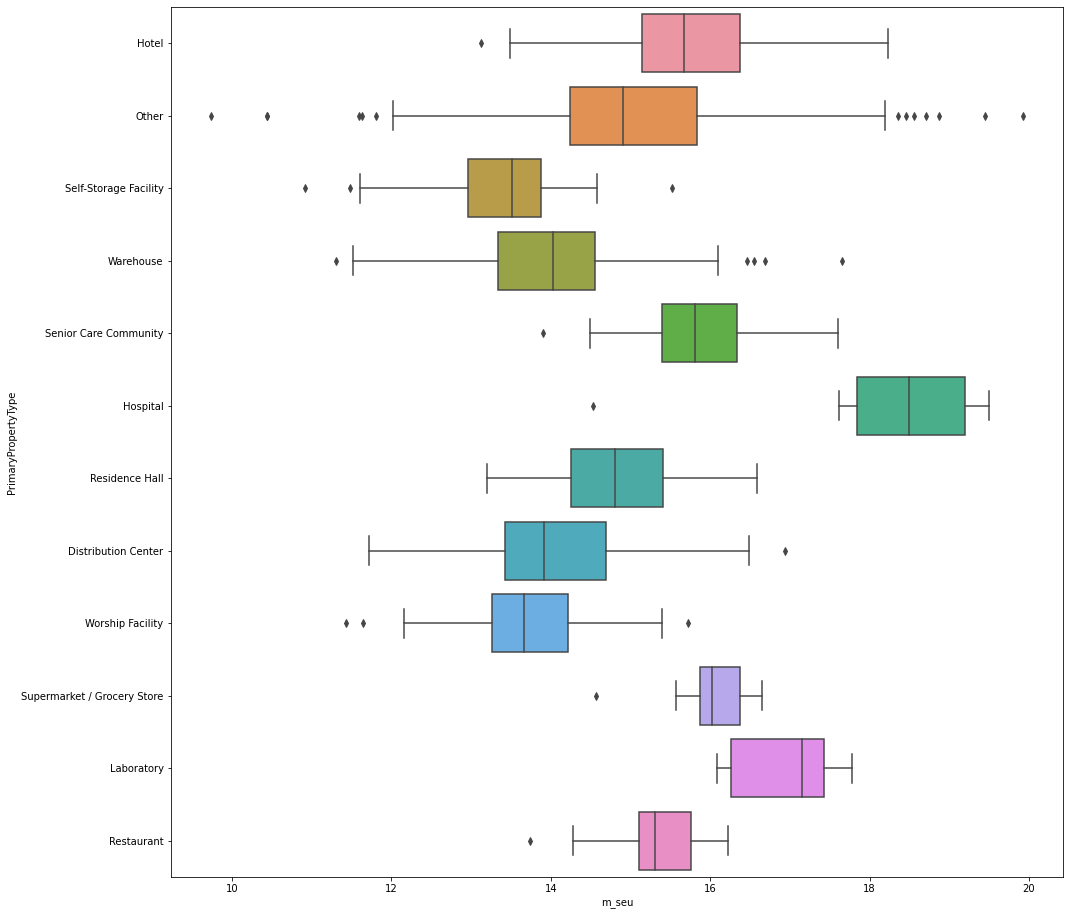

In [79]:
plt.figure(figsize=(16,16))
f1 = sns.boxplot(data= mfmean, x=np.log(mfmean['m_seu']), y='PrimaryPropertyType')

In [80]:
px.histogram(mfmean, x= 'YearBuilt')

In [81]:
#creating Year built to age of building
mfmean['Years'] = 2020 - mfmean['YearBuilt']
px.histogram(mfmean, x= 'Years')

In [82]:
px.scatter(y=np.log(mfmean.m_seu), x=mfmean.PropertyGFATotal)

In [83]:
px.scatter(y=np.log(mfmean.m_seu), x=np.log(mfmean.PropertyGFATotal))

### **Site Energy Use and CO2 emission**

<AxesSubplot:ylabel='m_seu'>

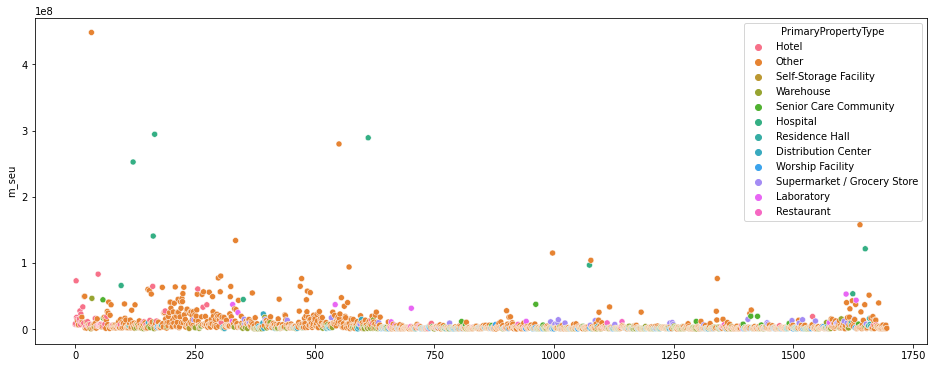

In [84]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=mfmean, x=mfmean.index , y='m_seu', hue='PrimaryPropertyType')

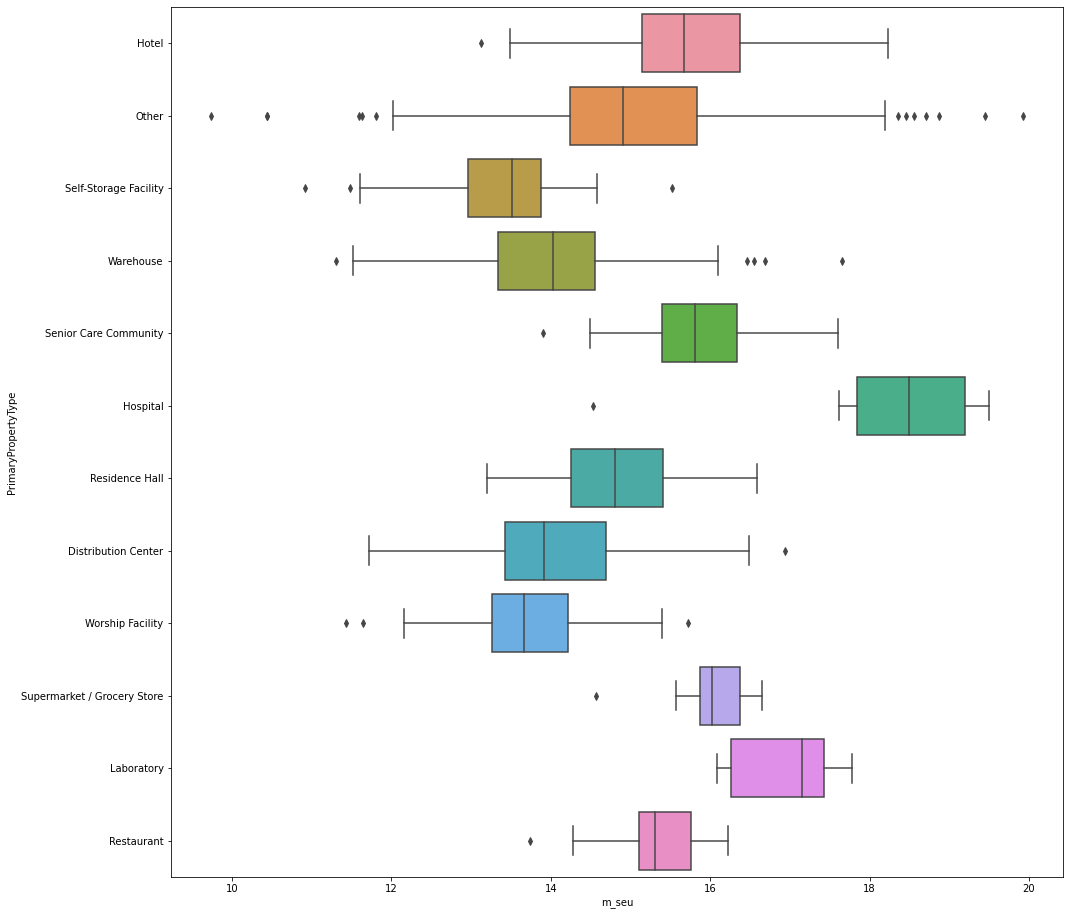

In [85]:
plt.figure(figsize=(16,16))
f1 = sns.boxplot(data= mfmean, x=np.log(mfmean['m_seu']), y='PrimaryPropertyType')

<AxesSubplot:xlabel='PropertyGFATotal', ylabel='m_seu'>

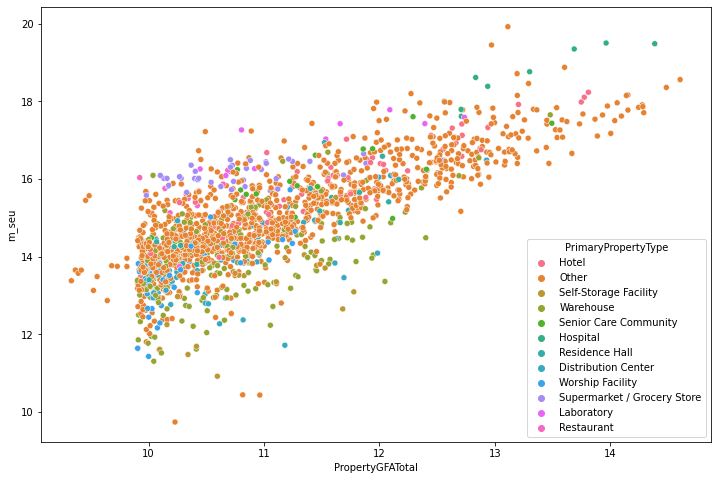

In [86]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = mfmean, x=np.log(mfmean['PropertyGFATotal']), y=np.log(mfmean['m_seu']), hue='PrimaryPropertyType')

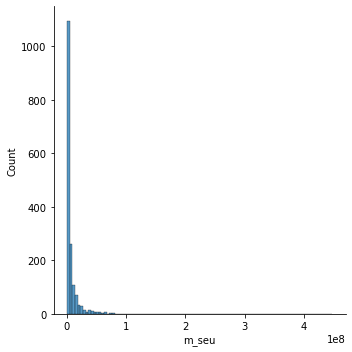

In [87]:
s = sns.displot(mfmean['m_seu'], bins=100)

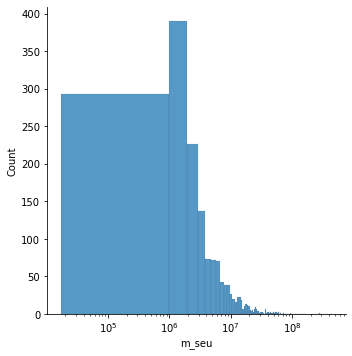

In [88]:
#exponential distribution when log scale on x
s = sns.displot(mfmean['m_seu'])
s.set(xscale='log')

In [89]:
mfmean['log_mseu'] = np.log10(mfmean['m_seu'])

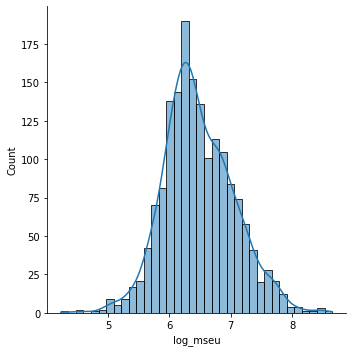

In [90]:
sns.displot(mfmean.log_mseu, kde=True)

<AxesSubplot:ylabel='m_co2e'>

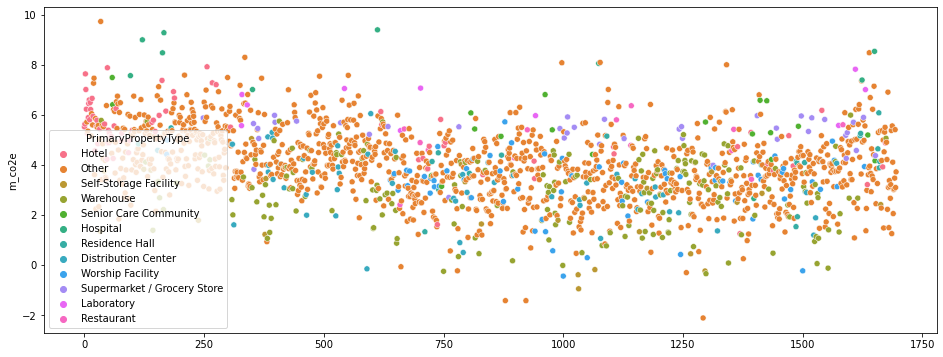

In [91]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=mfmean, x=mfmean.index , y=np.log(mfmean['m_co2e']), hue='PrimaryPropertyType')

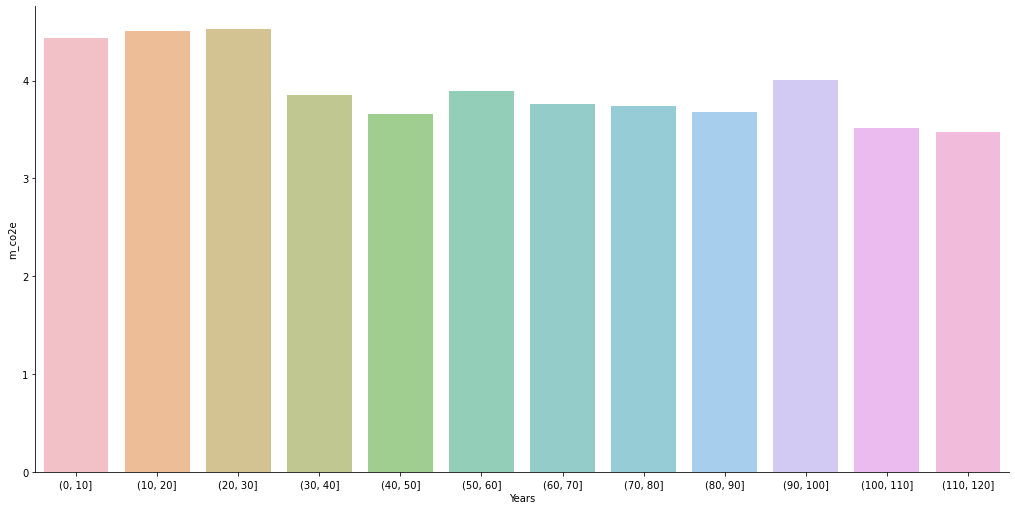

In [92]:
bins = pd.IntervalIndex.from_tuples([(0, 10), (10, 20), (20, 30), (30, 40), (40, 50), 
                                     (50, 60), (60, 70), (70,80), (80,90), (90,100), 
                                     (100,110), (110,120)])

sns.catplot( data=mfmean, kind="bar", x=pd.cut(mfmean['Years'], bins=bins), y=np.log(mfmean["m_co2e"]), ci=None, alpha=.6,
    height=7, aspect=2)

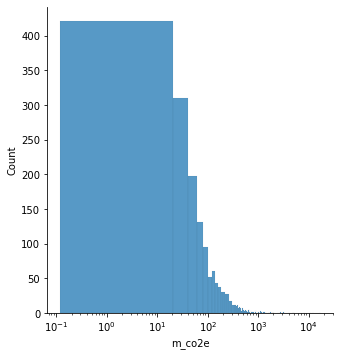

In [93]:
#exponential distribution when log scale on x
s = sns.displot(mfmean['m_co2e'])
s.set(xscale='log')

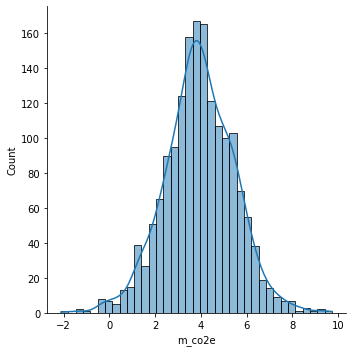

In [94]:
s = sns.displot(np.log(mfmean['m_co2e']), kde=True)


In [95]:
plt.figure(figsize=(10,10))

px.scatter(mfmean, x=np.log(mfmean['m_seu']), y = np.log(mfmean['m_co2e']), color='PrimaryPropertyType')

<Figure size 720x720 with 0 Axes>

## Encoding, imputer and standarisation

In [96]:
#Verifying the sum of energy sources is equal to site energy use
mfmean['sum_es'] = mfmean['NaturalGas(kBtu)'] + mfmean['SteamUse(kBtu)'] + mfmean['Electricity(kBtu)']
mfmean['diff_sum_mes'] = mfmean['m_seu'] - mfmean['sum_es']

In [97]:
mfmean.plot(
    kind='scatter', 
    x='m_seu',
    y='sum_es', 
    backend='plotly', 
    width=500,   
)

In [98]:
mfmean[mfmean['diff_sum_mes'] == abs(mfmean['diff_sum_mes']).max()]

OSEBuildingID  YearBuilt  NumberofFloors  PropertyGFATotal  \
1658          49972     1998.0             6.0          203030.0   

      ENERGYSTARScore       m_seu  SteamUse(kBtu)  Electricity(kBtu)  \
1658              NaN  51168308.0             0.0         28614613.0   

      NaturalGas(kBtu)  m_co2e PrimaryPropertyType  Years  log_mseu  \
1658               0.0  199.48               Other   22.0  7.709001   

          sum_es  diff_sum_mes  
1658  28614613.0    22553695.0

In [99]:
mf2016[mf2016['OSEBuildingID'] == 49972]

OSEBuildingID PrimaryPropertyType  DataYear  YearBuilt  NumberofFloors  \
1610          49972          University      2016       1998               6   

      PropertyGFATotal  ENERGYSTARScore  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
1610            203030              NaN           51168308.0             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  GHGEmissions(MetricTonsCO2e)  
1610         28614613.0               0.0                        199.48

In [100]:
mfmean['pdiff'] = (abs(mfmean['diff_sum_mes']) / mfmean['m_seu']) * 100 

In [101]:
px.histogram(mfmean.pdiff[mfmean['pdiff']>1])

In [102]:
mfmean.pdiff[mfmean.pdiff > 1].count()

24

In [103]:
#We only keep values with less than 1% of difference
mfmean = mfmean[mfmean.pdiff < 1]

In [104]:
mfmean.shape

(1667, 16)

In [105]:
mfmean['gaz_p']= mfmean['NaturalGas(kBtu)'] / mfmean['sum_es']
mfmean['steam_p']= mfmean['SteamUse(kBtu)'] / mfmean['sum_es']
mfmean['elec_p']= mfmean['Electricity(kBtu)'] / mfmean['sum_es']

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [106]:
mfmean.shape

(1667, 19)

In [107]:
mfmean.head()

OSEBuildingID  YearBuilt  NumberofFloors  PropertyGFATotal  \
0              1     1927.0            12.0           88434.0   
1              2     1996.0            11.0          103566.0   
2              3     1969.0            41.0          959050.0   
3              5     1926.0            10.0           61320.0   
4              8     1980.0            18.0          147735.0   

   ENERGYSTARScore        m_seu  SteamUse(kBtu)  Electricity(kBtu)  \
0             62.5   7103895.25    2.013457e+06          3816093.5   
1             56.0   8371084.00    0.000000e+00          3574131.0   
2             30.5  72858840.00    2.061348e+07         49644549.5   
3             28.5  17511952.00    1.283648e+07          2768973.5   
4             71.0  14500852.50    0.000000e+00          5717426.0   

   NaturalGas(kBtu)    m_co2e PrimaryPropertyType  Years  log_mseu  \
0         1274420.5   249.705               Hotel   93.0  6.851497   
1         4797033.5   279.685               Hotel   24.0  6.922782   
2         2601850.0  2075.380               Hotel   51.0  7.862482   
3         1906553.5  1111.385               Hotel   94.0  7.243335   
4         8783551.5   506.355               Hotel   40.0  7.161394   

         sum_es  diff_sum_mes     pdiff     gaz_p   steam_p    elec_p  
0  7.103971e+06       -75.750  0.001066  0.179396  0.283427  0.537178  
1  8.371164e+06       -80.500  0.000962  0.573043  0.000000  0.426957  
2  7.285988e+07     -1038.500  0.001425  0.035710  0.282919  0.681370  
3  1.751201e+07       -57.125  0.000326  0.108871  0.733010  0.158119  
4  1.450098e+07      -125.000  0.000862  0.605721  0.000000  0.394279

In [108]:
px.scatter(mfmean, y=['gaz_p','steam_p','elec_p'] )

In [109]:
px.histogram(mfmean, x = mfmean.index, y=['gaz_p','steam_p','elec_p'] )

### number of floors 

In [110]:
px.histogram(mfmean.NumberofFloors)

In [111]:
mfmean.NumberofFloors.describe()

count    1667.000000
mean        4.043791
std         6.073964
min         0.000000
25%         1.000000
50%         2.000000
75%         4.000000
max        76.000000
Name: NumberofFloors, dtype: float64

In [112]:
mfmean['nfloors'] = mfmean.NumberofFloors
mfmean.nfloors[mfmean.NumberofFloors <= mfmean.NumberofFloors.quantile(.25)] = 'small'
mfmean.nfloors[mfmean.NumberofFloors >= mfmean.NumberofFloors.quantile(.75)] = 'high'
mfmean.nfloors[(mfmean.NumberofFloors > mfmean.NumberofFloors.quantile(.25)) & (mfmean.NumberofFloors < mfmean.NumberofFloors.quantile(.75))] = 'medium'

#is_small = mfmean.nfloors < mfmean.nfloors.quantile(.25)
#is_high = mfmean.nfloors > mfmean.nfloors.quantile(.75)
#is_medium = ~(is_small | is_high)

#mfmean.nfloors = mfmean.nfloors.mask(is_small, 'small').mask(is_high, 'high').mask(is_medium, 'medium')

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

In [113]:
px.histogram(mfmean.nfloors)

In [114]:
mfmean.head()

OSEBuildingID  YearBuilt  NumberofFloors  PropertyGFATotal  \
0              1     1927.0            12.0           88434.0   
1              2     1996.0            11.0          103566.0   
2              3     1969.0            41.0          959050.0   
3              5     1926.0            10.0           61320.0   
4              8     1980.0            18.0          147735.0   

   ENERGYSTARScore        m_seu  SteamUse(kBtu)  Electricity(kBtu)  \
0             62.5   7103895.25    2.013457e+06          3816093.5   
1             56.0   8371084.00    0.000000e+00          3574131.0   
2             30.5  72858840.00    2.061348e+07         49644549.5   
3             28.5  17511952.00    1.283648e+07          2768973.5   
4             71.0  14500852.50    0.000000e+00          5717426.0   

   NaturalGas(kBtu)    m_co2e PrimaryPropertyType  Years  log_mseu  \
0         1274420.5   249.705               Hotel   93.0  6.851497   
1         4797033.5   279.685               Hotel   24.0  6.922782   
2         2601850.0  2075.380               Hotel   51.0  7.862482   
3         1906553.5  1111.385               Hotel   94.0  7.243335   
4         8783551.5   506.355               Hotel   40.0  7.161394   

         sum_es  diff_sum_mes     pdiff     gaz_p   steam_p    elec_p nfloors  
0  7.103971e+06       -75.750  0.001066  0.179396  0.283427  0.537178    high  
1  8.371164e+06       -80.500  0.000962  0.573043  0.000000  0.426957    high  
2  7.285988e+07     -1038.500  0.001425  0.035710  0.282919  0.681370    high  
3  1.751201e+07       -57.125  0.000326  0.108871  0.733010  0.158119    high  
4  1.450098e+07      -125.000  0.000862  0.605721  0.000000  0.394279    high

In [115]:
mfmean.shape

(1667, 20)

In [116]:
mfmean.isna().sum()

OSEBuildingID            0
YearBuilt                0
NumberofFloors           0
PropertyGFATotal         0
ENERGYSTARScore        526
m_seu                    0
SteamUse(kBtu)           0
Electricity(kBtu)        0
NaturalGas(kBtu)         0
m_co2e                   0
PrimaryPropertyType      0
Years                    0
log_mseu                 0
sum_es                   0
diff_sum_mes             0
pdiff                    0
gaz_p                    0
steam_p                  0
elec_p                   0
nfloors                  0
dtype: int64

### **Surface**

In [117]:
#add log for correlation evaluation
mfmean['logsurface'] = np.log(mfmean.PropertyGFATotal)
mfmean['logseu'] = np.log(mfmean.sum_es)
mfmean['logco2'] = np.log(mfmean.m_co2e)

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/rocio/.conda/envs/data/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<AxesSubplot:>

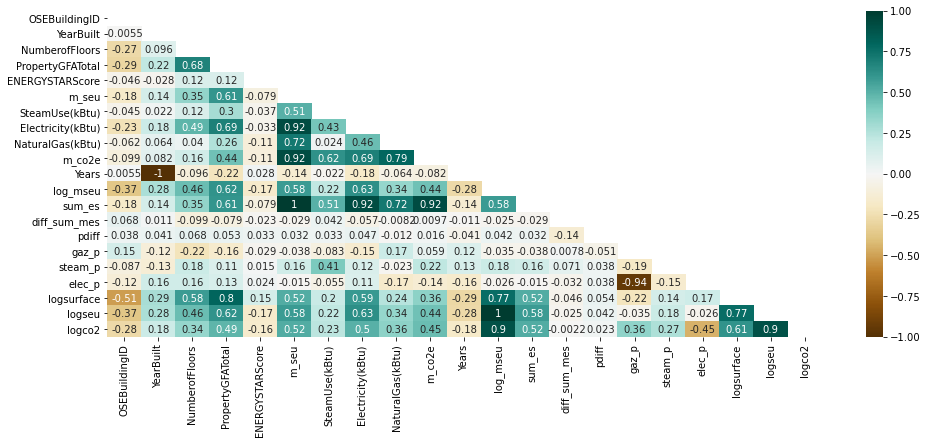

In [118]:
plt.figure(figsize=(16,6))
mask= np.triu(np.ones_like(mfmean.corr(), dtype=np.bool))
sns.heatmap(mfmean.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)

### pre-processing through pipeline

In [119]:
data = mfmean[['Years','PrimaryPropertyType','PropertyGFATotal','nfloors','steam_p','elec_p','sum_es','m_co2e']]
energy_score = mfmean['ENERGYSTARScore']
data.columns

Index(['Years', 'PrimaryPropertyType', 'PropertyGFATotal', 'nfloors',
       'steam_p', 'elec_p', 'sum_es', 'm_co2e'],
      dtype='object')

In [120]:
data = data.rename(columns = {'Years':'years', 'PrimaryPropertyType':'type', 'PropertyGFATotal':'surface', 'sum_es':'seu', 'm_co2e':'co2e'})

In [121]:
data.head()

years   type   surface nfloors   steam_p    elec_p           seu      co2e
0   93.0  Hotel   88434.0    high  0.283427  0.537178  7.103971e+06   249.705
1   24.0  Hotel  103566.0    high  0.000000  0.426957  8.371164e+06   279.685
2   51.0  Hotel  959050.0    high  0.282919  0.681370  7.285988e+07  2075.380
3   94.0  Hotel   61320.0    high  0.733010  0.158119  1.751201e+07  1111.385
4   40.0  Hotel  147735.0    high  0.000000  0.394279  1.450098e+07   506.355

In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1667 entries, 0 to 1695
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   years    1667 non-null   float64
 1   type     1667 non-null   object 
 2   surface  1667 non-null   float64
 3   nfloors  1667 non-null   object 
 4   steam_p  1667 non-null   float64
 5   elec_p   1667 non-null   float64
 6   seu      1667 non-null   float64
 7   co2e     1667 non-null   float64
dtypes: float64(6), object(2)
memory usage: 117.2+ KB


<AxesSubplot:>

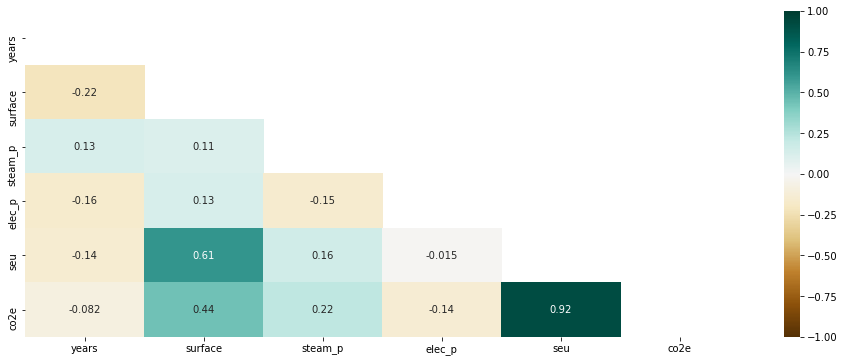

In [123]:
plt.figure(figsize=(16,6))
mask= np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG', mask=mask)

In [124]:
#auxiliar action to work in a new jupyter-notebook
data = data.reset_index(drop=True)
#data.to_csv('data_for_analysis')

In [125]:
data.to_csv('data_for_analysis', index=False)

In [126]:
data['surface'] = np.log(data.surface)

In [127]:
data.type.value_counts()

Other                          1125
Warehouse                       201
Hotel                            76
Worship Facility                 71
Distribution Center              53
Supermarket / Grocery Store      39
Self-Storage Facility            28
Residence Hall                   21
Senior Care Community            20
Restaurant                       13
Hospital                         10
Laboratory                       10
Name: type, dtype: int64

# Prediction

In [128]:
#Split dataset
from sklearn.model_selection import train_test_split

#Preprocessing
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer

#Pipeline
from sklearn.pipeline import Pipeline

#GridSearch and crossèvalidation
from sklearn.model_selection import GridSearchCV

#metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

#Fonctions
def xxxxresults_gscv (model):
    results = pd.DataFrame(model['gridsearchcv'].cv_results_)
    best_params= model['gridsearchcv'].best_params_
    
    return results

def xxxx_best_scaler(scaler):
    scaler_impact = pd.DataFrame(columns={'scaler', 'score', 'params'})
    
    for method in scalers:
    
        preprocessor = ColumnTransformer(transformers=[('logtrans',logtransformer,['surface']),
                                               ('scaler', method ,['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])
    
        parameter_lr = {'regressor__fit_intercept':[True, False],'regressor__normalize': [True, False]}
        fold = KFold(n_splits = 23, shuffle = True,random_state=100)
        pipe2 = Pipeline(steps =[('preprocessor', preprocessor),('gridsearchcv', GridSearchCV(
                                                                TransformedTargetRegressor(
                                                                    regressor = LinearRegression(), 
                                                                    func = np.log,
                                                                    inverse_func = np.exp),
                                                                param_grid= parameter_lr,
                                                                cv = fold, scoring="r2"))])
        lr_gskfs_seu= pipe2.fit(X_train, y_train_e)
        results, best_params = results_gscv(lr_gskfs_seu)
        scaler_impact = scaler_impact.append({'scaler': str(method), 
                                          'score':round(results.mean_test_score.max(),3), 
                                          'params':str(best_params)}, ignore_index=True)

    return scaler_impact 

# Dividing X and Y

In [129]:
X = data.iloc[:,:-2]
Y = data.iloc[:,6:]

In [130]:
X

years   type    surface nfloors   steam_p    elec_p
0      93.0  Hotel  11.390012    high  0.283427  0.537178
1      24.0  Hotel  11.547964    high  0.000000  0.426957
2      51.0  Hotel  13.773698    high  0.282919  0.681370
3      94.0  Hotel  11.023861    high  0.733010  0.158119
4      40.0  Hotel  11.903175    high  0.000000  0.394279
...     ...    ...        ...     ...       ...       ...
1662   30.0  Other   9.416867   small  0.000000  0.616974
1663   16.0  Other   9.680344   small  0.000000  0.417296
1664   46.0  Other   9.484709   small  0.000000  0.310820
1665   31.0  Other   9.554001   small  0.000000  0.484898
1666   82.0  Other   9.812359   small  0.000000  0.375189

[1667 rows x 6 columns]

In [131]:
Y

seu      co2e
0     7.103971e+06   249.705
1     8.371164e+06   279.685
2     7.285988e+07  2075.380
3     1.751201e+07  1111.385
4     1.450098e+07   506.355
...            ...       ...
1662  8.497459e+05    20.940
1663  9.502760e+05    32.170
1664  5.765898e+06   223.540
1665  7.194712e+05    22.110
1666  1.152896e+06    41.270

[1667 rows x 2 columns]

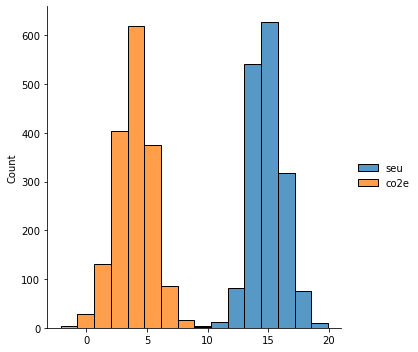

In [132]:
#Transforming y data as log
logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
Y_log = logtransformer.transform(Y)
sns.displot(Y_log)

In [133]:
y_e = Y['seu'] 
y_c = Y['co2e']

# Pre-processing Data
As it was shown targets and building surface have a normal distribution when they are express through log. 
OneHoteEncoder is applied to building type 
Ordinal encoder is applied to number of floots.

- surface = log + Scaler
- n_floor = OrdinalEncoder
- type = OneHotEncoder
- other numerical variables = StandardScaler

In [134]:
preprocessor = ColumnTransformer(transformers=[('scaler', RobustScaler(),['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])

# X_train, y_train, X_test, y_test
Train data represent 80% of data set, and the Test data 20%

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=15)
print("Data set: {} lignes, \nEntrainement: {} lignes,\nTest: {} lignes.\n".format(X.shape[0],X_train.shape[0],X_test.shape[0]))

Data set: 1667 lignes, 
Entrainement: 1333 lignes,
Test: 334 lignes.



**Exploring train and test data**

<AxesSubplot:>

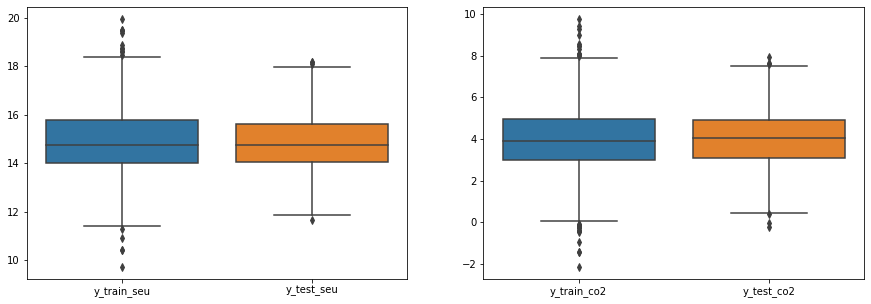

In [136]:
df1 = pd.DataFrame({'y_train_seu':np.log(y_train['seu']), 'y_test_seu':np.log(y_test['seu'])})
df2 = pd.DataFrame({'y_train_co2':np.log(y_train['co2e']),'y_test_co2':np.log(y_test['co2e'])})
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df1, ax=axes[0])
sns.boxplot(data=df2, ax=axes[1])


# Pre-processing

In [137]:
preprocessor.fit_transform(X_train)
preprocessor.transformers_[1][1].get_feature_names()

array(['x0_Distribution Center', 'x0_Hospital', 'x0_Hotel',
       'x0_Laboratory', 'x0_Other', 'x0_Residence Hall', 'x0_Restaurant',
       'x0_Self-Storage Facility', 'x0_Senior Care Community',
       'x0_Supermarket / Grocery Store', 'x0_Warehouse',
       'x0_Worship Facility'], dtype=object)

In [138]:
column = ['years', 'surface', 'steam_p', 'elec_p','x0_Distribution Center', 'x0_Hospital', 'x0_Hotel',
       'x0_Laboratory', 'x0_Other', 'x0_Residence Hall', 'x0_Restaurant',
       'x0_Self-Storage Facility', 'x0_Senior Care Community',
       'x0_Supermarket / Grocery Store', 'x0_Warehouse',
       'x0_Worship Facility','nfloors' ]
X_trans=pd.DataFrame(preprocessor.fit_transform(X_train), columns=column)

In [139]:
X_trans

years   surface   steam_p    elec_p  x0_Distribution Center  \
0    -0.559322  0.268559  0.000000  0.238770                     0.0   
1     0.779661 -0.376067  0.073912 -0.465249                     0.0   
2    -0.152542  0.163225  0.000000 -0.508170                     0.0   
3    -0.813559  1.729243  0.000000  0.363413                     0.0   
4    -0.559322  1.205637  0.000000 -0.626644                     0.0   
...        ...       ...       ...       ...                     ...   
1328  0.288136 -0.661165  0.000000 -1.054053                     0.0   
1329 -0.610169  0.602456  0.000000  0.485773                     0.0   
1330 -0.338983  0.189064  0.000000  0.028664                     0.0   
1331 -0.203390 -0.440118  0.000000 -0.005924                     0.0   
1332  0.050847 -0.606119  0.000000 -0.873428                     0.0   

      x0_Hospital  x0_Hotel  x0_Laboratory  x0_Other  x0_Residence Hall  \
0             0.0       0.0            0.0       1.0                0.0   
1             0.0       0.0            0.0       1.0                0.0   
2             0.0       0.0            0.0       0.0                0.0   
3             0.0       0.0            0.0       1.0                0.0   
4             0.0       0.0            0.0       0.0                0.0   
...           ...       ...            ...       ...                ...   
1328          0.0       0.0            0.0       0.0                0.0   
1329          0.0       0.0            0.0       1.0                0.0   
1330          0.0       0.0            0.0       0.0                0.0   
1331          0.0       0.0            0.0       1.0                0.0   
1332          0.0       0.0            0.0       0.0                0.0   

      x0_Restaurant  x0_Self-Storage Facility  x0_Senior Care Community  \
0               0.0                       0.0                       0.0   
1               0.0                       0.0                       0.0   
2               0.0                       0.0                       0.0   
3               0.0                       0.0                       0.0   
4               0.0                       0.0                       0.0   
...             ...                       ...                       ...   
1328            0.0                       0.0                       0.0   
1329            0.0                       0.0                       0.0   
1330            0.0                       0.0                       0.0   
1331            0.0                       0.0                       0.0   
1332            0.0                       0.0                       0.0   

      x0_Supermarket / Grocery Store  x0_Warehouse  x0_Worship Facility  \
0                                0.0           0.0                  0.0   
1                                0.0           0.0                  0.0   
2                                0.0           0.0                  1.0   
3                                0.0           0.0                  0.0   
4                                0.0           1.0                  0.0   
...                              ...           ...                  ...   
1328                             0.0           0.0                  1.0   
1329                             0.0           0.0                  0.0   
1330                             0.0           1.0                  0.0   
1331                             0.0           0.0                  0.0   
1332                             0.0           0.0                  1.0   

      nfloors  
0         2.0  
1         1.0  
2         2.0  
3         0.0  
4         2.0  
...       ...  
1328      1.0  
1329      0.0  
1330      1.0  
1331      1.0  
1332      1.0  

[1333 rows x 17 columns]

# Linear Regression 
## Linear Regression with default values

In [140]:
model = LinearRegression()
trans_model = TransformedTargetRegressor(regressor = model ,func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',trans_model)])

lr_default_seu = pipeline.fit(X_train,y_train['seu'])

print('score r2 - test:', lr_default_seu.score(X_test,y_test['seu']))
print('score r2 - train:', lr_default_seu.score(X_train,y_train['seu']))


score r2 - test: 0.784290636798587
score r2 - train: 0.5261119039543876


### Influence of the Scaler on the score

In order to evaluate the influence of the scaler on the response of the modele a simple LinearRegression model will be used.

In [141]:
def scaler_impact(scalers, models, X_train, y_train, X_test, y_test):
    
    scaler_impact = pd.DataFrame(columns={'model',
                                          'scaler', 
                                          'train_score_r2', 
                                          'test_score_r2',
                                          'train_MSE',
                                          'test_MSE',
                                          'train_RMSE',
                                          'test_RMSE'})
       
    for model in models:
                                          
        for method in scalers:

            preprocessor = ColumnTransformer(transformers=[('scaler', method,['years', 'surface', 'steam_p', 'elec_p']),
                                                  ('onehotencoder', OneHotEncoder(), ['type']), 
                                                   ('ordinalencoder', OrdinalEncoder(),['nfloors'])])

            pipeline = Pipeline(steps =[('preprocessor', preprocessor),('trans_model',TransformedTargetRegressor(
                                                                        regressor = model, 
                                                                        func = np.log,
                                                                        inverse_func = np.exp))])
            #linear model
            clf= pipeline.fit(X_train, y_train)

            #metrics to evaluate scaler            
            train_score_r2 = clf.score(X_train,y_train)
            test_score_r2 = clf.score(X_test,y_test)
            train_MSE =  mean_squared_error(clf.predict(X_train),y_train) 
            test_MSE = mean_squared_error(clf.predict(X_test),y_test)
            train_rMSE = np.sqrt(train_MSE)
            test_rMSE = np.sqrt(test_MSE)

            #scaler_impact resutls in dataframe
            scaler_impact = scaler_impact.append({'model':str(model),
                                              'scaler': str(method), 
                                              'train_score_r2':train_score_r2, 
                                              'test_score_r2':test_score_r2,
                                              'train_MSE' : train_MSE,
                                              'test_MSE' : test_MSE,
                                              'train_RMSE' : train_MSE,
                                              'test_RMSE' : test_MSE }, ignore_index=True)

        column_titles = ['model','scaler','train_score_r2','test_score_r2','train_MSE','test_MSE','train_RMSE','test_RMSE']

        scaler_impact= scaler_impact.reindex(columns=column_titles)

    return scaler_impact 

In [180]:
scalers_to_evaluate= [StandardScaler(),MinMaxScaler(),MaxAbsScaler(),RobustScaler(),Normalizer()]
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), LinearSVR(), RandomForestRegressor()]
scalers_impact = scaler_impact(scalers_to_evaluate, models,X_train, y_train['seu'], X_test,y_test['seu'])


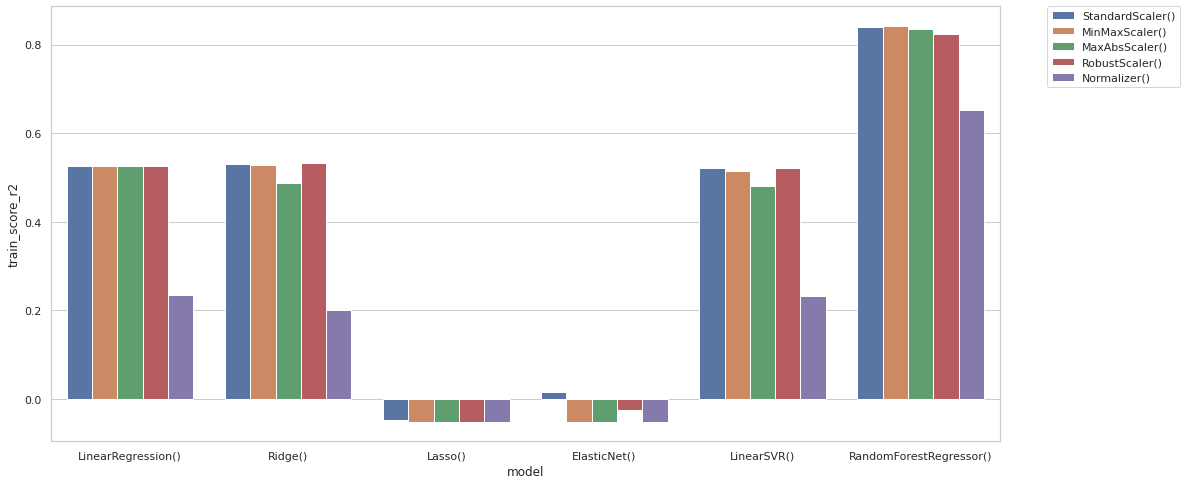

In [182]:

plt.figure(figsize=(17,8))
g = sns.barplot(data=scalers_impact, x='model', y='train_score_r2', hue='scaler')
sns.set_style("whitegrid")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

Normalization is good to use when you know that the distribution of your data does not follow a Gaussian distribution. This can be useful in algorithms that do not assume any distribution of the data like K-Nearest Neighbors and Neural Networks.


## Gridsearch cv model to find best parameters

In [137]:
model = LinearRegression()
lr_params = {'regressor__fit_intercept':[True, False],'regressor__normalize': [True, False]}
pipeline= Pipeline(steps =[('preprocessor', preprocessor),('gridsearchcv', GridSearchCV(
                                                                TransformedTargetRegressor(
                                                                    regressor = LinearRegression(), 
                                                                    func = np.log,
                                                                    inverse_func = np.exp),
                                                                param_grid= lr_params,
                                                                cv = 5,
                                                                scoring = ('r2','neg_mean_absolute_error'),
                                                                return_train_score = True,
                                                                refit = 'r2',
                                                                n_jobs= -1
                                                                ))])

lrgs_seu = pipeline.fit(X_train,y_train['seu'])

In [138]:
pd.DataFrame(lrgs_seu['gridsearchcv'].cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.028423      0.016320         0.001867        0.000220   
1       0.003528      0.000427         0.001499        0.000330   
2       0.003293      0.000829         0.001799        0.000630   
3       0.003153      0.000973         0.001393        0.000423   

  param_regressor__fit_intercept param_regressor__normalize  \
0                           True                       True   
1                           True                      False   
2                          False                       True   
3                          False                      False   

                                              params  split0_test_r2  \
0  {'regressor__fit_intercept': True, 'regressor_...        0.815155   
1  {'regressor__fit_intercept': True, 'regressor_...        0.814530   
2  {'regressor__fit_intercept': False, 'regressor...        0.814530   
3  {'regressor__fit_intercept': False, 'regressor...        0.814530   

   split1_test_r2  split2_test_r2  split3_test_r2  split4_test_r2  \
0        0.674394        0.635250        0.507683        0.209283   
1        0.704898        0.644513        0.507683        0.211988   
2        0.704898        0.644513        0.507683        0.211988   
3        0.704898        0.644513        0.507683        0.211988   

   mean_test_r2  std_test_r2  rank_test_r2  split0_train_r2  split1_train_r2  \
0      0.568353     0.204570             4         0.437169         0.515444   
1      0.576722     0.207545             3         0.436867         0.509521   
2      0.576722     0.207545             1         0.436867         0.509521   
3      0.576722     0.207545             1         0.436867         0.509521   

   split2_train_r2  split3_train_r2  split4_train_r2  mean_train_r2  \
0         0.398451         0.540219         0.635712       0.505399   
1         0.513426         0.540219         0.654047       0.530816   
2         0.513426         0.540219         0.654047       0.530816   
3         0.513426         0.540219         0.654047       0.530816   

   std_train_r2  split0_test_neg_mean_absolute_error  \
0      0.082931                        -3.865563e+06   
1      0.070508                        -3.864026e+06   
2      0.070508                        -3.864026e+06   
3      0.070508                        -3.864026e+06   

   split1_test_neg_mean_absolute_error  split2_test_neg_mean_absolute_error  \
0                        -3.477867e+06                        -3.395188e+06   
1                        -3.374302e+06                        -3.412484e+06   
2                        -3.374302e+06                        -3.412484e+06   
3                        -3.374302e+06                        -3.412484e+06   

   split3_test_neg_mean_absolute_error  split4_test_neg_mean_absolute_error  \
0                        -4.384214e+06                        -4.627035e+06   
1                        -4.384214e+06                        -4.594923e+06   
2                        -4.384214e+06                        -4.594923e+06   
3                        -4.384214e+06                        -4.594923e+06   

   mean_test_neg_mean_absolute_error  std_test_neg_mean_absolute_error  \
0                      -3.949973e+06                     486779.774594   
1                      -3.925990e+06                     495848.378657   
2                      -3.925990e+06                     495848.378657   
3                      -3.925990e+06                     495848.378657   

   rank_test_neg_mean_absolute_error  split0_train_neg_mean_absolute_error  \
0                                  4                         -3.911927e+06   
1                                  1                         -3.913510e+06   
2                                  2                         -3.913510e+06   
3                                  2                         -3.913510e+06   

   split1_train_neg_mean_absolute_error  split2_trai

In [139]:
np.max(lrgs_seu['gridsearchcv'].cv_results_['mean_test_r2'])

0.5767224349149487

In [140]:
lr_bp_seu = lrgs_seu['gridsearchcv'].best_params_
lr_bp_seu

{'regressor__fit_intercept': False, 'regressor__normalize': True}

In [141]:
a= lrgs_seu.score(X_train, y_train['seu'])
a

0.5261119039543858

In [313]:
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer()]

impact = scaler_methods_gr(scalers)

NameError: name 'scaler_methods_gr' is not defined

In [142]:
model_e_list = ['Linear Regression', 'LinearRegression + GScv']
scores_e_test_r2_list = [lr_default.score(X_test,y_test['seu']), lrgs_seu.score(X_test, y_test['seu'])]
scores_e_train_r2_list = [lr_default.score(X_train,y_train['seu']), lrgs_seu.score(X_train, y_train['seu'])]
best_params_e_list = ['default',lr_bp_seu,]


model_c_list = ['Linear Regression default']
scores_c_test_r2_list = [lr_default.score(X_test,y_test['co2e'])]
scores_c_train_r2_list = [lr_default.score(X_train,y_train['co2e'])]

#best_params_c_list

results_table_seu = pd.DataFrame(
                            {'model': model_e_list, 
                             'score_r2_test':scores_e_test_r2_list,
                             'score_r2_train':scores_e_train_r2_list})

results_table_co2 = pd.DataFrame(
                            {'model': model_c_list, 
                             'score_r2_test':scores_c_test_r2_list,
                             'score_r2_train':scores_c_train_r2_list})

NameError: name 'lr_default' is not defined

In [ ]:
results_table_seu

In [ ]:
results_table_co2

In [ ]:
#Fonction not use : k-fold with shuffle 
def kfold_shuffle(n,X_train, y_train_e):
    #parameters for model
    n_splits = n
    folds = KFold(n_splits = n, shuffle = True, random_state=100) 
    parameters = {'fit_intercept':True, 'normalize': True}
    model_pipe = TransformedTargetRegressor(regressor = LinearRegression(**parameters),func = np.log, inverse_func = np.exp)
    pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model', model_pipe)])
    #cross-validation model with k-fold shuffle
    model = cross_validate(pipeline, X_train, y_train_e, scoring='r2', cv=folds)
    
    scores_cv = cross_val_score(pipeline, X_train, y_train_e, scoring='r2', cv=folds)
    score_cv = pd.DataFrame({'split': np.arange(0,n_splits,1), 'scores':scores_cv})
    score_cv_mean = score_cv.scores.mean()
    print('mean score:',score_cv_mean)

    return score_cv_mean,model  

In [ ]:
sns.boxplot([])

In [ ]:
lr_seu_score = lr_seu.score(X_train,y_train_e)

Test score is better than train score. If we look at the data distribution for test and train, we can see that most of the biggest and smallest values of the data set are in the train set, the model seems to not be able to predict small values. There is no prediction for values lower than 12.

In [ ]:
y_train_pred = lr_seu.predict(X_train)
y_test_pred = lr_seu.predict(X_test)

## Linear Regression with cross-validation
In order to improuve the model, the kfold method is applied. First without shuffle.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold

In [ ]:
def val_kfold(i_nsplit,f_nsplit,p_split, pipeline, X_train, y_train):
    
    val_curve = pd.DataFrame(columns=['nsplit','mean_score'])
    splits = np.arange(i_nsplit,f_nsplit,p_split)  
    
    for n in splits:
        folds = KFold(n_splits = n, shuffle = False)
        scores_cv = cross_val_score(pipeline, X_train, y_train, scoring='r2', cv=folds)
        score_cv_mean=np.mean(scores_cv)
        val_curve = val_curve.append({'nsplit': n,'mean_score':score_cv_mean }, ignore_index=True)
    
    best_score = val_curve.mean_score.max()
    a = val_curve.nsplit[val_curve['mean_score'] == val_curve.mean_score.max()].to_list()
    best_nsplit= a[0]
    
    print('best score:', best_score)
    print('best n_folds:', best_nsplit)
    return val_curve, best_score, best_nsplit

In [ ]:
parameters = {'fit_intercept':True, 'normalize': False}
model = TransformedTargetRegressor(regressor = LinearRegression(**parameters),func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model)])

vc_kfold_seu, lr_kfold_score_seu, lr_kfold_nsplit_seu= val_kfold(2,10,1, pipeline, X_train, y_train_e)


In [ ]:
vc_kfold_seu

In [ ]:
px.line(vc_kfold_seu, x='nsplit', y='mean_score', text= 'mean_score')

Best number of splits is 4, lets observe how data is ditributed and r2 for each split.

In [ ]:
def kfold_analysis(n, data, X_shape, X, y):
    #model definition
    n_splits = n
    folds = KFold(n_splits = n, shuffle = False)
    parameters = {'fit_intercept':True, 'normalize': False}
    model = TransformedTargetRegressor(regressor = LinearRegression(**parameters),func = np.log, inverse_func = np.exp)
    pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model)]) 
    
    #cross-validation model
    scores_cv = cross_val_score(pipeline, X, y, scoring='r2', cv=folds)
    model = cross_validate(pipeline, X, y, scoring='r2', cv=folds)
    score_cv = pd.DataFrame({'split': np.arange(0,n_splits,1), 'scores':scores_cv})
    score_cv_mean = score_cv.scores.mean()
    print('mean score:',score_cv_mean)

    #obtaining data for each split
    size = round(X_shape / n_splits)
    new_data=data.loc[0:X_shape]
    new_data['split'] = ''
    l = 0
    for i in range(0,n_splits):
        new_data.loc[l:(i+1)*size,'split']= 's' + str(i)
        l = ((i+1)*size)+ 1
    new_data.loc[X_shape,'split']= 's' + str(n-1)
    plt.figure(figsize=(16,6))
    
    #data for courve validation, data with new column with split information, model
    return score_cv, new_data, model   
    

In [ ]:
vc_cv_seu, new_data, lr_kf_seu = kfold_analysis(4, data, len(X_train), X_train, y_train_e)

In [ ]:
vc_cv_seu

In [ ]:
plt.figure(figsize=(16,6))
sns.boxplot(data=new_data, y=np.log(new_data['seu']), x='split')

In [ ]:
mean=vc_cv_seu.scores.mean()

fig2=go.Figure()
fig2.add_trace(go.Bar(x=vc_cv_seu['split'], y=vc_cv_seu['scores'], name='score'))
fig2.add_trace(go.Scatter(name='mean', x=[0,3.5], y=[mean,mean], mode='lines'))
#fig2

Mean score for training data is improuve but, when we observe the distribution of the data in each split, we can see that the smaller values are in split 3.

## Kfold model with Suffle=True
Shuffleing the data will help to have a better distribution of values.

In [ ]:
def val_kfold_shuffle(i_nsplit,f_nsplit,p_split,rs,  X, y, pipeline):
    val_curve = pd.DataFrame(columns=['nsplit','mean_score'])
    splits = np.arange(i_nsplit,f_nsplit,p_split) 
    
    for n in splits:
        folds = KFold(n_splits = n, shuffle = True, random_state=rs)
        scores_cv = cross_val_score(pipeline, X, y, scoring='r2', cv=folds)
        score_cv_mean=np.mean(scores_cv)
        val_curve = val_curve.append({'nsplit': n,'mean_score':score_cv_mean }, ignore_index=True)
    
    best_score = val_curve.mean_score.max()
    aa = val_curve.nsplit[val_curve['mean_score'] == val_curve.mean_score.max()].to_list()
    best_nsplit= aa[0]
    
    print('best mean_score:', best_score)
    print('best n_folds:', best_nsplit)
    return val_curve, best_score, best_nsplit

In [ ]:
parameters = {'fit_intercept':True, 'normalize': True}
model_pipe = TransformedTargetRegressor(regressor = LinearRegression(**parameters),func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model_pipe)])

vc_lr_kfs, lr_kfs_score, lr_kfs_nsplit  = val_kfold_shuffle(2,30,1,63, X_train, y_train_e, pipeline)

In [ ]:
px.line(vc_lr_kfs, x='nsplit', y='mean_score')

In [ ]:
#Cross-Validation with K-fold shuffle.
folds = KFold(n_splits = 6, shuffle = True, random_state=63) 
parameters = {'fit_intercept':True, 'normalize': True}
model_pipe = TransformedTargetRegressor(regressor = LinearRegression(**parameters),func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model', model_pipe)])
lr_kfs_seu = cross_validate(pipeline, X_train, y_train_e, scoring='r2', cv=folds)

In [ ]:
#results from Cross-Validation with K-fold shuffle.
results = pd.DataFrame(lr_kfs_seu)
results.test_score.mean()

In [ ]:
fig3=go.Figure()
fig3.add_trace(go.Bar(name='split score', x=results.index, y=results.test_score))
fig3.add_trace(go.Scatter(name='mean', x=[0,len(results)], y=[results.test_score.mean(),results.test_score.mean()], mode='lines'))
fig3

##  Linear Regression with Gridsearch
### K-fold - shuffle = False
Using GRidSearchcv to perfomre cross-validation and hyperparameter tuning.
- n of folds : 4
- fit_intercept : False and True
- Normalize:True and False 

In [ ]:
def results_gscv (model):
    results = pd.DataFrame(model['gridsearchcv'].cv_results_)
    best_params= model['gridsearchcv'].best_params_
    
    return results, best_params

In [ ]:
parameter_lr = {'regressor__fit_intercept':[True, False],'regressor__normalize': [True, False]}
fold1 = KFold(n_splits = 4, shuffle = False)
pipeline= Pipeline(steps =[('preprocessor', preprocessor),('gridsearchcv', GridSearchCV(
                                                                TransformedTargetRegressor(
                                                                    regressor = LinearRegression(), 
                                                                    func = np.log,
                                                                    inverse_func = np.exp),
                                                                param_grid= parameter_lr,
                                                                cv = fold1,
                                                                scoring = ('r2','neg_mean_absolute_error'),
                                                                return_train_score = True,
                                                                refit = 'r2'
                                                                ))])

lr_gskf_seu = pipeline.fit(X_train,y_train_e)
results, best_params = results_gscv(lr_gskf_seu)

In [ ]:
print(best_params)
print(results.mean_test_r2.max())
[results.mean_test_r2]

In [ ]:
print(lr_gskf_seu.score(X_train, y_train_e))
print(lr_gskf_seu.score(X_test, y_test_e))

### K-fold - shuffle = True
Using GRidSearchcv to perfomre cross-validation and hyperparameter tuning.
- n of folds : 6 , shuffle = True, random_state=63
- fit_intercept : False and True
- Normalize:True and False 

In [ ]:
parameter_lr = {'regressor__fit_intercept':[True, False],'regressor__normalize': [True, False]}
fold = KFold(n_splits = 6, shuffle = True,random_state=63)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('gridsearchcv', GridSearchCV(
                                                                TransformedTargetRegressor(
                                                                    regressor = LinearRegression(), 
                                                                    func = np.log,
                                                                    inverse_func = np.exp),
                                                                param_grid= parameter_lr,
                                                                cv = fold, 
                                                                scoring = ('r2','neg_mean_absolute_error'),
                                                                return_train_score = True,
                                                                refit = 'r2'))])

lr_gskfs_seu= pipeline.fit(X_train, y_train_e)
results, best_params = results_gscv(lr_gskfs_seu)

In [ ]:
print(best_params)
print(results.mean_test_r2.max())
[results.mean_test_r2]

In [ ]:
print(lr_gskfs_seu.score(X_train, y_train_e))
print(lr_gskfs_seu.score(X_test, y_test_e))

In [ ]:
list_models=pd.DataFrame({'model_type':['LR','LR + KFold','LR + KFold_shuffle', 'LR + GS + kfold', 'LR + GS+ Kfold_shuffle'], 
                          'model':['lr_seu', 'lr_kf_seu', 'lr_kfs_seu', 'lr_gskf_seu', 'lr_gskfs_seu'], 
                          'score_r2': [
                              round(lr_seu.score(X_train, y_train_e),3),
                              round(np.mean(lr_kf_seu['test_score']),3), 
                              round(np.mean(lr_kfs_seu['test_score']),3), 
                              round(pd.DataFrame(lr_gskf_seu['gridsearchcv'].cv_results_).mean_test_r2.max(),3),
                              round(pd.DataFrame(lr_gskfs_seu['gridsearchcv'].cv_results_).mean_test_r2.max(),3)
                          ],
                          'nfolds':[2, 4, 6, 4, 6],
                         'params':['fit_intercept:True, normalize: False',
                                   'fit_intercept:True, normalize: False',
                                   'fit_intercept:True, normalize: True, random_state=63',
                                    lr_gskf_seu['gridsearchcv'].best_params_,
                                    lr_gskfs_seu['gridsearchcv'].best_params_
                         ]})

In [ ]:
list_models

In [ ]:
px.bar(list_models, x='model_type', y='score_r2', text='score_r2')

## Work on differents Scalers
Lets use the LR + GS + kfold_shuffle

Scalers: 
- MixMaxScaler()
- MaxAbsScaler()
- StandardScaler()
- RobustScaler()
- Normalizer()

In [ ]:
impact

In [ ]:
plt.figure(figsize=(16,6))
px.bar(impact, x='scaler', y ='score', text='score')
#sns.barplot(data= impact, x='scaler', y ='score', hue='score')
#plt.legend(loc='best')

# Ridge regression 

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import validation_curve

## Ridge regression simple

In [ ]:
preprocessor = ColumnTransformer(transformers=[('logtrans',logtransformer,['surface']),
                                               ('scaler', StandardScaler() ,['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])
p_ridge = {'alpha':0.02, 'normalize':False, 'solver':'auto'}
model_pipe = TransformedTargetRegressor(regressor = Ridge(**p_ridge),func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model',model_pipe)])

ridge = pipeline.fit(X_train, y_train_e)

In [ ]:
ridge_score = round(ridge.score(X_train, y_train_e),3)

### Defining scaler

In [ ]:
def scaler_methods(scalers, X, y, model):
    
    scaler_impact = pd.DataFrame(columns={'scaler', 'score'})
    
    
    for method in scalers:
        preprocessor = ColumnTransformer(transformers=[('logtrans',logtransformer,['surface']),
                                               ('scaler', method,['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])
        model_pipe = TransformedTargetRegressor(regressor = model ,func = np.log, inverse_func = np.exp)
        pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model',model_pipe)])

        reg_model = pipeline.fit(X, y)
        score = reg_model.score(X, y)
        
        scaler_impact = scaler_impact.append({'scaler': method, 
                                          'score':score
                                          }, ignore_index=True)
    score_max = scaler_impact.score.max()
    a = scaler_impact.scaler[scaler_impact.score==score_max].to_list()
    best_method = a[0]
    
    return scaler_impact, best_method, score_max 

In [ ]:
scalers = [MinMaxScaler(), MaxAbsScaler(), StandardScaler(), RobustScaler(), Normalizer()]
model = Ridge(alpha = 0.02, normalize=False,solver='auto')

scaler_study, best_scaler, ridge_score = scaler_methods(scalers, X_train, y_train_e, model )


In [ ]:
scaler_study, best_scaler

From now on we will use the MinMaxScaler()

## Validation curve to determine alpha 

In [ ]:
preprocessor = ColumnTransformer(transformers=[('logtrans',logtransformer,['surface']),
                                               ('scaler', best_scaler,['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])


fold = KFold(n_splits = 4, shuffle = True,random_state=100)
Xprep = pd.DataFrame(preprocessor.fit_transform(X_train))
model = TransformedTargetRegressor(regressor = Ridge(normalize=True),func = np.log, inverse_func = np.exp)
alpha = np.arange(0,0.1,0.01)
train_scores, valid_scores = validation_curve(model, Xprep, y_train_e, cv=fold , param_name='regressor__alpha',param_range=alpha, scoring='r2')

In [ ]:
plt.plot(alpha, np.median(train_scores, 1), color='blue', label='training score')
plt.plot(alpha, np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
#plt.ylim(0.6, 0.8)
plt.xlabel('alpha')
plt.ylabel('score');

In [ ]:
np.median(train_scores, 1)

## Ridge with alpha=0.02 looking for n of kfold

In [ ]:
#model = Ridge: {'alpha':0.02, 'solver': 'auto', 'normalize':False}
model = Ridge(alpha = 0.01, normalize=False, solver='svd')
model_pipe = TransformedTargetRegressor(regressor = model,func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model_pipe)])
vc_ridge, ridge_score_kf, ridge_nsplit_kf = val_Kfold(2,30,1, pipeline, X_train, y_train_e)

In [ ]:
px.line(vc_ridge, x='nsplit', y='mean_score')

## Ridge with alpha=0.2 looking for n of kfold shuffle

In [ ]:
def val_Kfold_shu(i_nsplit,f_nsplit,p_split,i_state,f_state,p_state, X, y, pipeline):
    val_curve = pd.DataFrame(columns=['nsplit','mean_score', 'rs'])
    results = pd.DataFrame(columns=['rs','nsplit','mean_score'])
    
    splits = np.arange(i_nsplit,f_nsplit,p_split)
    
    rstate = np.arange(i_state,f_state,p_state)
    
    for rs in rstate: 
        
        val_curve = pd.DataFrame(columns=['nsplit','mean_score', 'rs'])
        
        for n in splits:
            folds = KFold(n_splits = n, shuffle = True, random_state=rs )
            scores_cv = cross_val_score(pipeline, X, y, scoring='r2', cv=folds)
            score_cv_mean=np.mean(scores_cv)
            val_curve = val_curve.append({'nsplit': n,'mean_score':score_cv_mean, 'rs':rs }, ignore_index=True)
            
        best_score = val_curve.mean_score.max()
        aa = val_curve.nsplit[val_curve['mean_score'] == val_curve.mean_score.max()].to_list()
        aaa = val_curve.rs[val_curve['mean_score'] == val_curve.mean_score.max()].to_list()
        best_nsplit= aa[0]
        best_rs = aaa[0]
    
        results = results.append({'rs':rs,'nsplit': best_nsplit,  'mean_score': best_score}, ignore_index=True)
        aa = results.nsplit[results['mean_score'] == results.mean_score.max()].to_list()
        aaa = results.rs[results['mean_score'] == results.mean_score.max()].to_list()
        best_nsplit= aa[0]
        best_rs = aaa[0]
        
    print('best mean_score:', results.mean_score.max())
    print('best n_split:', best_nsplit)
    print('best r_state:', best_rs)
    
    return results

In [ ]:
model = Ridge(alpha = 0.01, normalize=False, solver='svd')
model_pipe = TransformedTargetRegressor(regressor = model,func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model_pipe)])
shu_kfold = val_Kfold_shu(2,10,1,2,100,1, X_train, y_train_e, pipeline)

In [ ]:
shu_kfold[shu_kfold.mean_score==shu_kfold.mean_score.max()]

In [ ]:
from sklearn.linear_model import RidgeCV

fold = KFold(n_splits = 6, shuffle = True, random_state=63 )

model = RidgeCV(alphas = [1e-3], normalize=False, gcv_mode=['svd'], cv=fold)

model_pipe = TransformedTargetRegressor(regressor = model,func = np.log, inverse_func = np.exp)

pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model_pipe)])

ridge_cv_bp = pipeline.fit(X_train, y_train_e)
#vc_ridge_kfs, ridge_score_kfs, ridge_nsplit_kfs = val_Kfold_shuffle(2,30,1,63, X_train, y_train_e, pipeline)

In [ ]:
ridge_cv_bp.score(X_train, y_train_e)

In [ ]:
ridge_cv_bp.score(X_test, y_test_e)

In [ ]:
Y = pd.DataFrame({'train': np.log(y_train_e), 'test':np.log(y_test_e)})
sns.boxplot(data=Y)

## Ridge Gridsearch for best params

In [ ]:
alpha = np.arange(0.001,0.02,0.001)
solvers = ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
r_params = {'regressor__alpha':alpha , 'regressor__solver': solvers, 'regressor__normalize':[True, False]}
nfolds = KFold(n_splits = 4, shuffle = False)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('gridsearchcv', GridSearchCV(
                                                                TransformedTargetRegressor(
                                                                    regressor = Ridge(), 
                                                                    func = np.log,
                                                                    inverse_func = np.exp),
                                                                param_grid= r_params,
                                                                cv = nfolds,
                                                                scoring = ('r2','neg_mean_absolute_error'),
                                                                return_train_score = True,
                                                                refit = 'neg_mean_absolute_error'
                                                                ))])

ridge_gs = pipeline.fit(X_train, y_train_e)
 

In [ ]:
res_ridge_gs, ridge_best_params = results_gscv(ridge_gs)

In [ ]:
res_ridge_gs.mean_test_r2.max()

In [ ]:
ridge_best_params

In [ ]:
a = ridge_gs.score(X_train, y_train_e)
a

### Gridsearch for kfold shuffle on

In [ ]:
nfolds = KFold(n_splits = 6, shuffle = True, random_state=63)
ridge_gs_shuffle = pipeline.fit(X_train, y_train_e)

In [ ]:
res_ridge_gss, ridge_s_best_params = results_gscv(ridge_gs_shuffle)

In [ ]:
res_ridge_gss.mean_test_r2.max()

In [ ]:
ridge_s_best_params

## Cross_validation model with best_params

In [ ]:
model = Ridge(alpha = 0.001, normalize=False, solver='svd')
model_pipe = TransformedTargetRegressor(regressor = model,func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps =[('preprocessor', preprocessor),('model',model_pipe)])

vc_ridgebp, ridgebp_score_kf, ridgebp_nsplit_kf = val_Kfold(2,30,1, pipeline, X_train, y_train_e)

vc_ridgebp_kfs, ridgebp_score_kfs, ridgebp_nsplit_kfs = val_Kfold_shuffle(2,30,1,63, X_train, y_train_e, pipeline)

In [ ]:
vc_ridgebp.mean_score.mean()

In [ ]:
vc_ridgebp_kfs.mean_score.mean()

In [ ]:
preprocessor = ColumnTransformer(transformers=[('logtrans',logtransformer,['surface']),
                                               ('scaler', best_scaler ,['years', 'surface', 'steam_p', 'elec_p']),
                                              ('onehotencoder', OneHotEncoder(), ['type']), 
                                               ('ordinalencoder', OrdinalEncoder(),['nfloors'])])

folds = KFold(n_splits=6, shuffle=True, random_state=63)
p_ridge = {'alpha':0.001, 'normalize':False, 'solver':'svd'}
model_pipe = TransformedTargetRegressor(regressor = Ridge(**p_ridge),func = np.log, inverse_func = np.exp)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model',model_pipe)])

best_ridge = cross_validate(pipeline, X_train, y_train_e, scoring='r2', cv=folds)


In [ ]:
best_ridge_score_shuffle = np.mean(best_ridge['test_score'])

In [ ]:
best_ridge_score_shuffle

In [ ]:
print(np.mean(cross_val_score(pipeline, X_test, y_test_e, scoring='r2', cv=5)))

In [ ]:
list_models=pd.DataFrame({'model_type':['Ridge','Ridge + KFold','Ridge + KFold_shuffle', 'Ridge + GS + kfold', 'Ridge + GS+ Kfold_shuffle'], 
                          'model':['ridge','vc_ridge', 'vc_ridge_kfs', 'ridge_gs', 'ridge_gs_shuffle', 'mean_cross_val', 'mean_cross_val_shuffle'], 
                          'score_r2': [
                              round(ridge.score(X_train, y_train_e),3),
                              round(np.mean(ridge_score_kf['test_score']),3), 
                              round(np.mean(ridge_score_kfs['test_score']),3), 
                              round(pd.DataFrame(res_ridge_gs.mean_test_r2.max(),3)),
                              round(pd.DataFrame(res_ridge_gss.mean_test_r2.max(),3)),
                              round(pd.vc_ridgebp.mean_score.mean()),
                              round(vc_ridgebp_kfs.mean_score.mean())
                          ],
                          'nfolds':[2, 4, 6, 4, 6, '2-30', '2-30, random_state=63', '6 - rs=63'],
                         'params':['alpha:0.001, normalize:False, solver:svd',
                                   'alpha:0.001, normalize:False, solver:svd',
                                   'alpha:0.001, normalize:False, solver:svd',
                                   'alpha:0.001, normalize:False, solver:svd',
                                    'alpha:0.001, normalize:False, solver:svd',
                                    'alpha:0.001, normalize:False, solver:svd'
                         ]})